In [1]:
%load_ext autoreload
%autoreload 2
import synapseclient as sc
import pandas as pd
import sys
import warnings
import nbconvert
sys.path.append("../../src")

import utils.query_utils as query
import utils.viz_utils as viz
import utils.preprocessing_utils as process
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")
sns.set_style("dark")
%matplotlib inline


syn = sc.login()

Welcome, aryton tediarjo!



# Introduction

This notebook explores how each PDKIT features are being distributed in each age groups.
The feature naming convention is {coordinate orientation}.name_of_the_feature. In this notebook we will explore how our subject from mpower version 1, mpower version 2, passive data (neglect for now) and elevateMS age affects the number of steps, freeze occurences and the speed of gait. We will also compare how each of the control fare against the PD and MS patients. Afterwards, we will see which of the feature is most predictive in terms of predicting PD and MS patients.

Analysis will be done in users that have contributed at least 3 records, and will be assessed in different aggregation of their own data.


### Processing Steps:
In wiki

### Coordinate Orientation: 
 - <b> x  </b> : feature computation on x-axis
 - <b> y  </b> : feature computation on y-axis
 - <b> z  </b> : feature computation on z-axis
 - <b> AA </b>: feature computation on resultant signals
 - <b> FC </b>: feature combination of feature in x, y and z 

In [2]:
data = query.get_file_entity(syn, "syn21281633")

## add additional features ##
data = process.addFeatures().transform(data)

In [3]:
grouped_data = process.collapseFeatures().transform(data)

# Number of Record Ids on each groups

In [4]:
temp = data[["class", "version", "PD", "MS", "gender", "recordId"]]
temp.groupby(["class", "gender"]).count()["recordId"]

class                   gender
ems_case                female     2250
                        male       2224
ems_control             female      161
                        male         14
mpower_passive_case     female     5301
                        male      14667
mpower_passive_control  female     1729
                        male        263
mpower_v1_case          female    30345
                        male      40382
mpower_v1_control       female     5583
                        male      23835
mpower_v2_case          female     1761
                        male       2206
mpower_v2_control       female       79
                        male        206
Name: recordId, dtype: int64

In [5]:
temp = grouped_data[["class", "version", "PD", "MS", "gender", "recordId"]]
temp.groupby(["class", "gender"]).count()["recordId"]

class                   gender
ems_case                female     154
                        male        45
ems_control             female      18
                        male         5
mpower_passive_case     female      11
                        male        12
mpower_passive_control  female       5
                        male         7
mpower_v1_case          female     484
                        male       891
mpower_v1_control       female     643
                        male      2787
mpower_v2_case          female     106
                        male       124
mpower_v2_control       female      23
                        male        17
Name: recordId, dtype: int64

In [6]:
grouped_data["version"].value_counts()

mpower_v1         4805
mpower_v2          270
ems_active         222
mpower_passive      35
Name: version, dtype: int64

# Some Summary Stats

In [7]:
non_duplicated = data.drop_duplicates(subset="healthCode", keep='first')

print("#### SUMMARY STATS ####\n")

print("Number of healthcodes : %s" %len(data["healthCode"].unique()))
print("Number of records     : %s" %data.shape[0])
print("Number of V1 data     : %s" %data[data["version"] == "mpower_v1"].shape[0])
print("Number of V2 data     : %s" %data[data["version"] == "mpower_v2"].shape[0])
print("Number of Passive data: %s" %data[data["version"] == "mpower_passive"].shape[0])
print("Number of EMS data    : %s" %data[data["version"] == "ems_active"].shape[0])
print("Number of controls    : %s" %non_duplicated[non_duplicated["is_control"] == 1].shape[0])
print("Number of cases       : %s" %non_duplicated[non_duplicated["is_control"] == 0].shape[0])

#### SUMMARY STATS ####

Number of healthcodes : 5332
Number of records     : 131006
Number of V1 data     : 100145
Number of V2 data     : 4252
Number of Passive data: 21960
Number of EMS data    : 4649
Number of controls    : 3505
Number of cases       : 1827


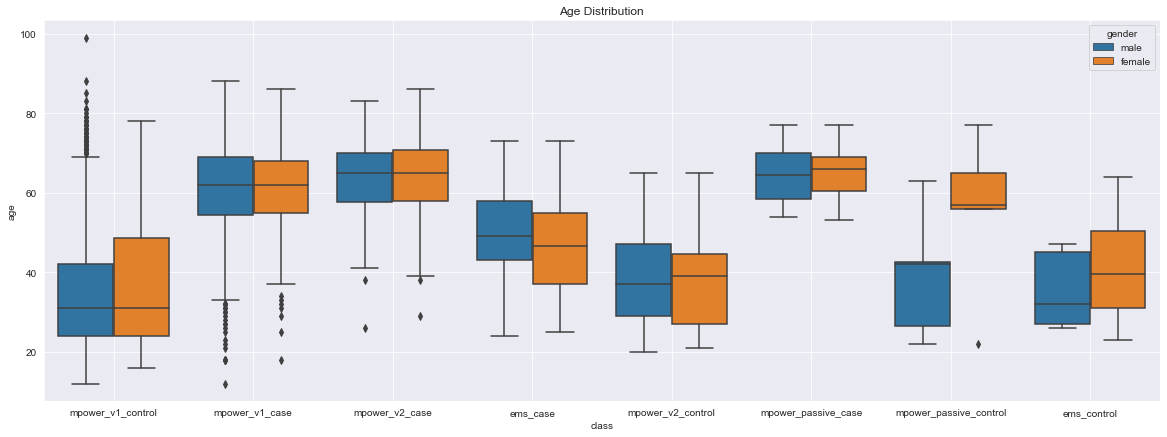

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)

sns.boxplot(y = grouped_data["age"], x = grouped_data["class"], hue = grouped_data["gender"], ax = axes)
axes.set_title("Age Distribution")
axes.figure.set_size_inches(20,7)
axes.grid()

# Exploratory Data Analysis

### 1a.) Distribution of Features in Controls Accross Age Bins (based on records in active data)

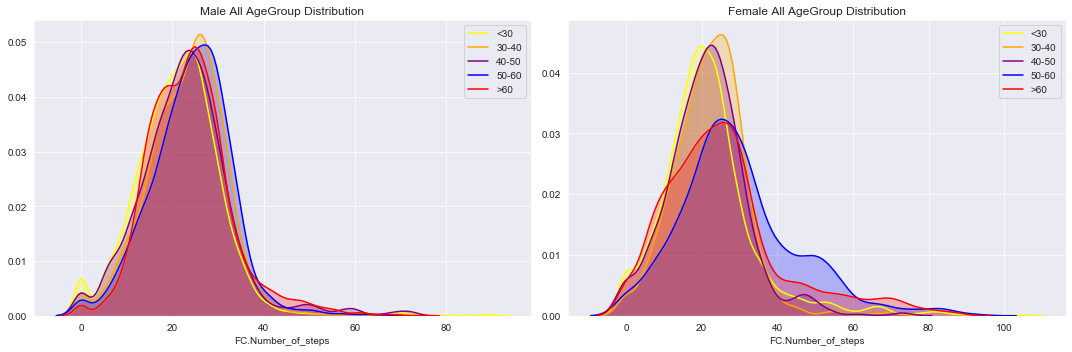

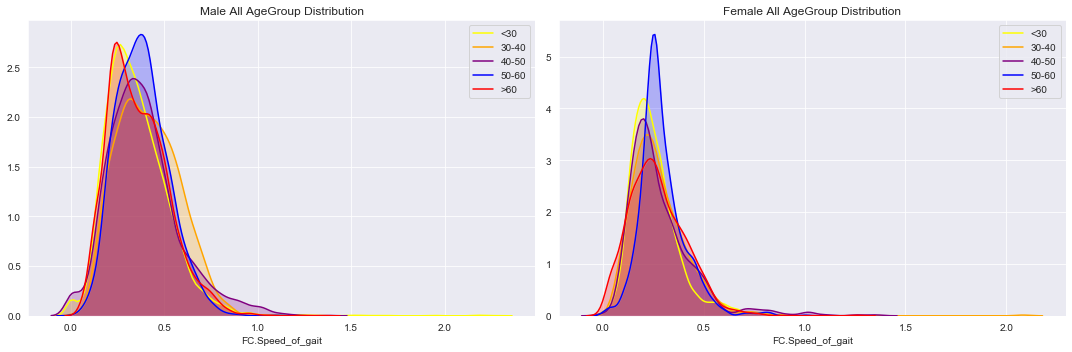

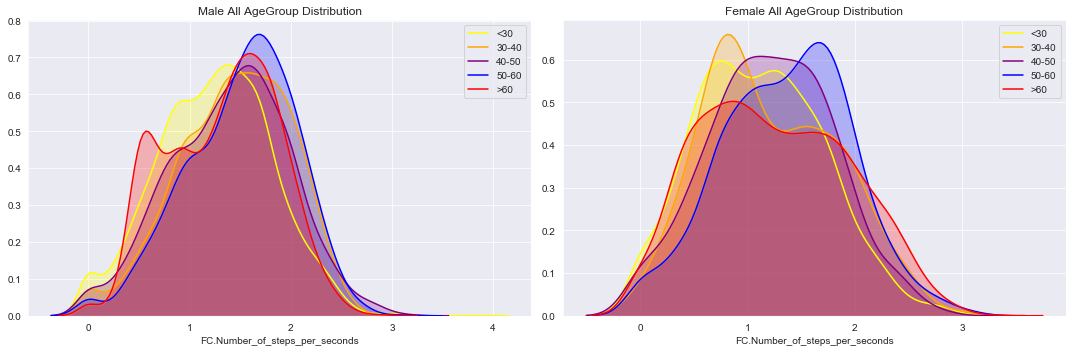

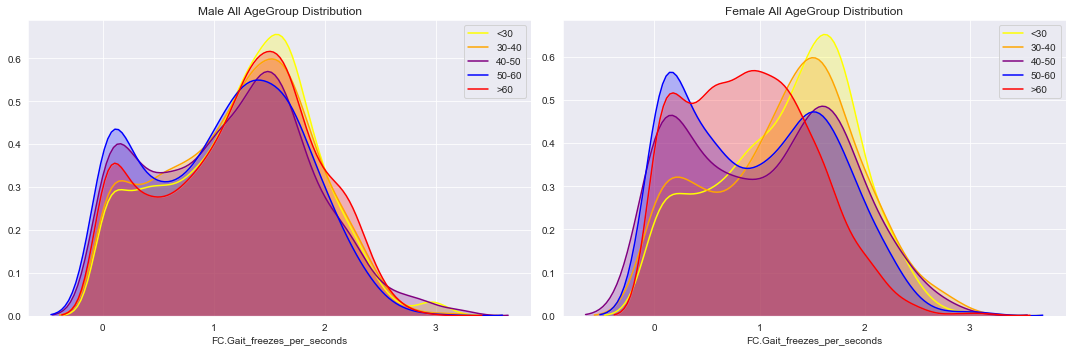

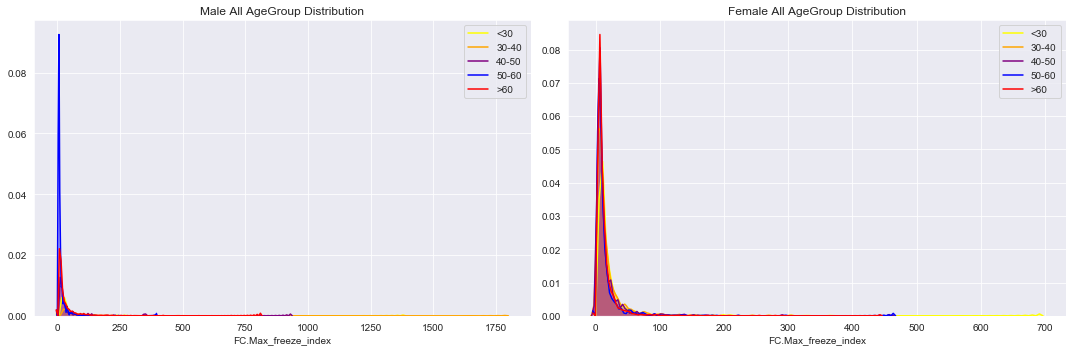

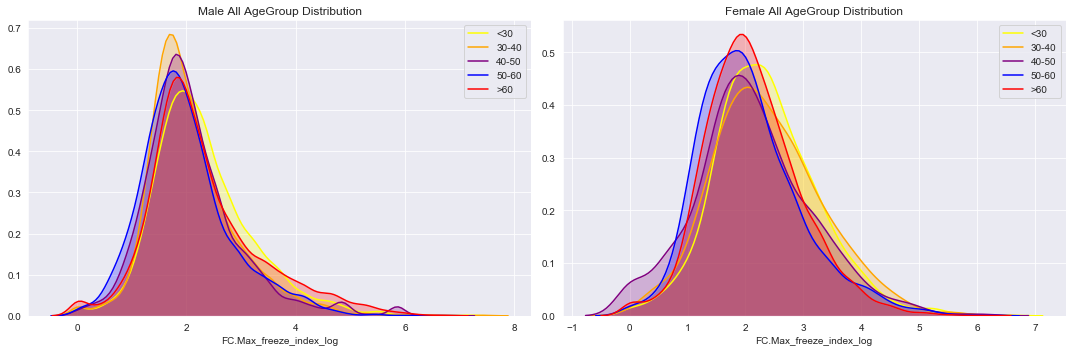

In [9]:
## Number of Steps
for feature in [feat for feat in data.columns if ("FC" in feat)]:
    viz.visualize_agegroups(data[(data["is_control"] == 1)], feature)

### 1b.) Distribution of Features in Controls Accross Age Bins (based on healthCodes in active data)

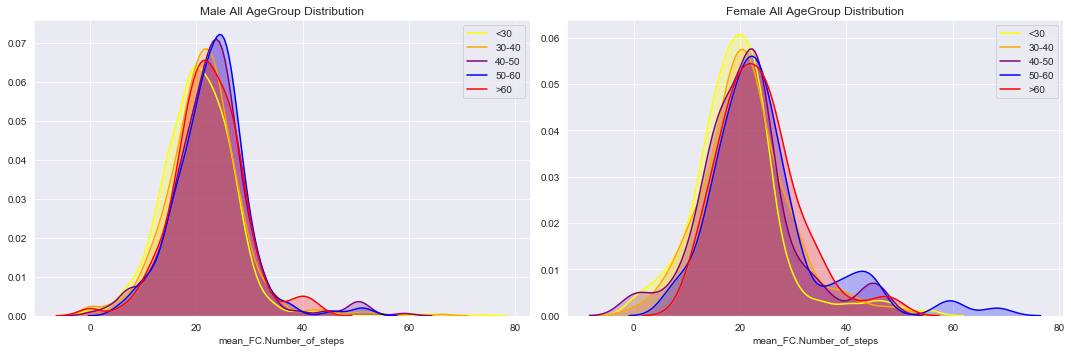

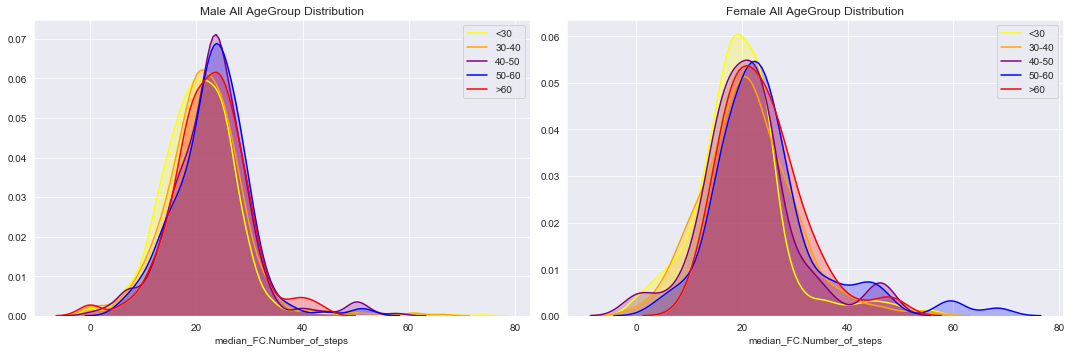

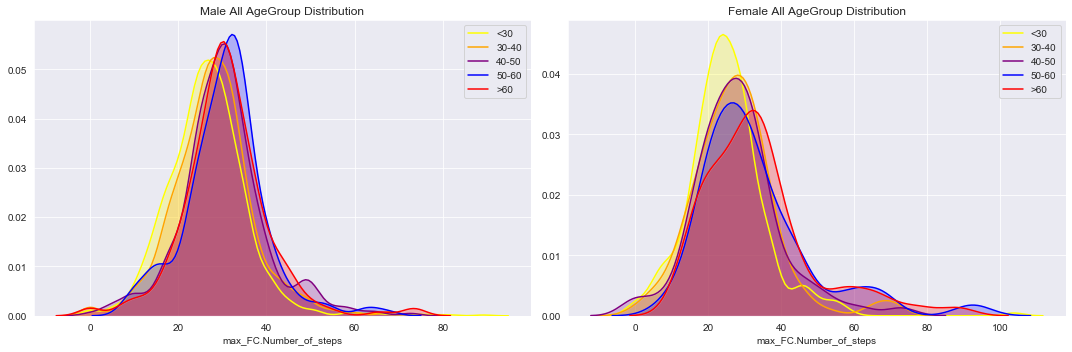

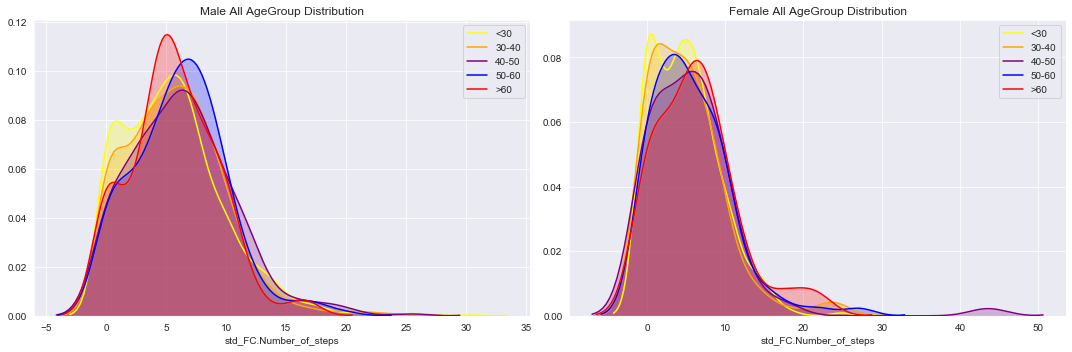

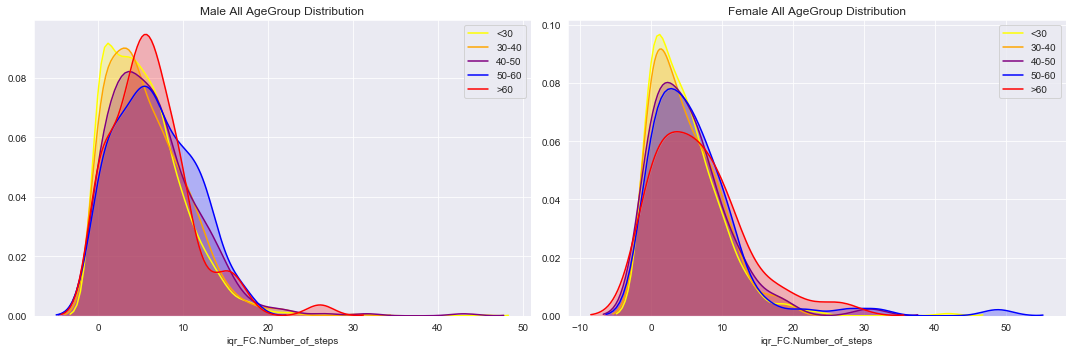

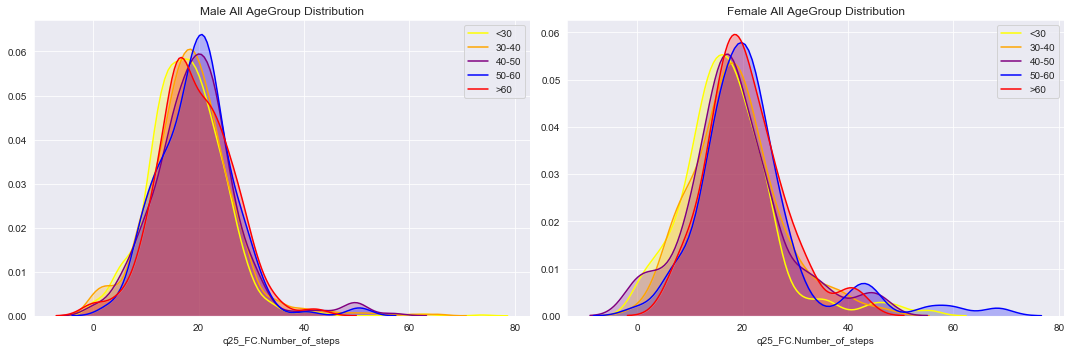

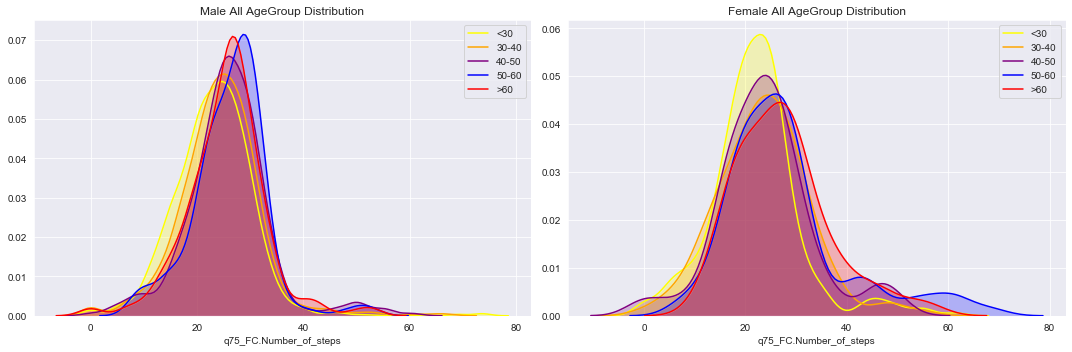

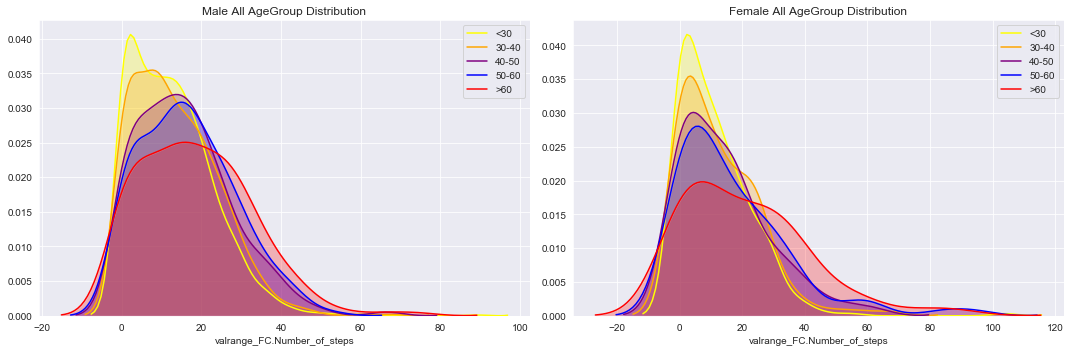

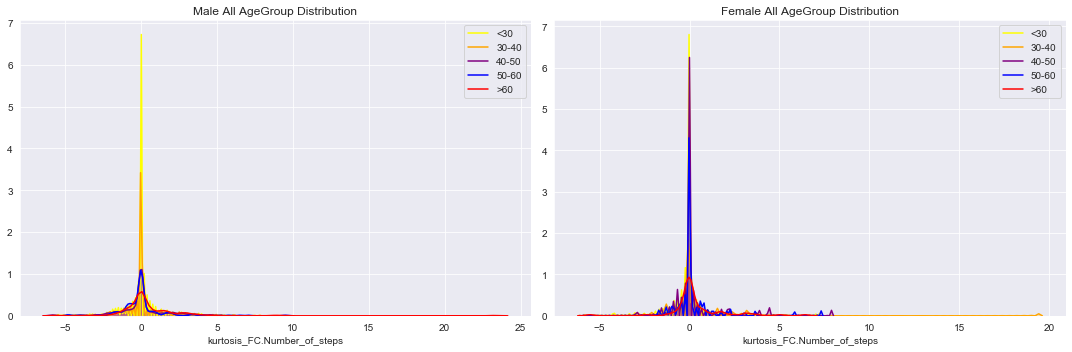

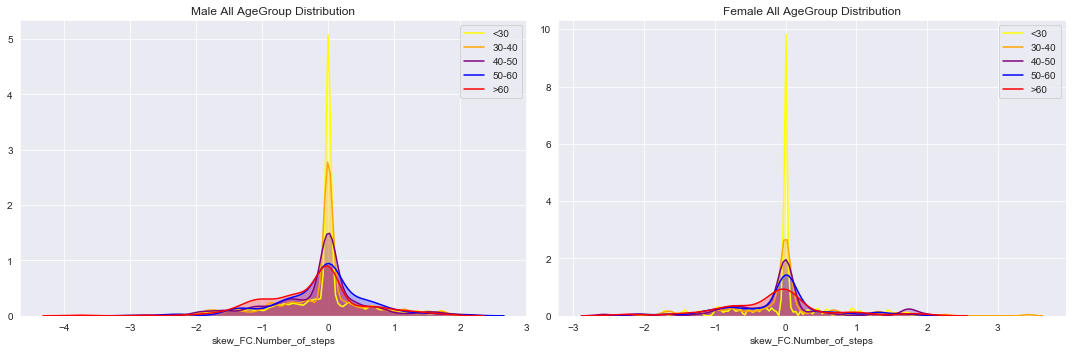

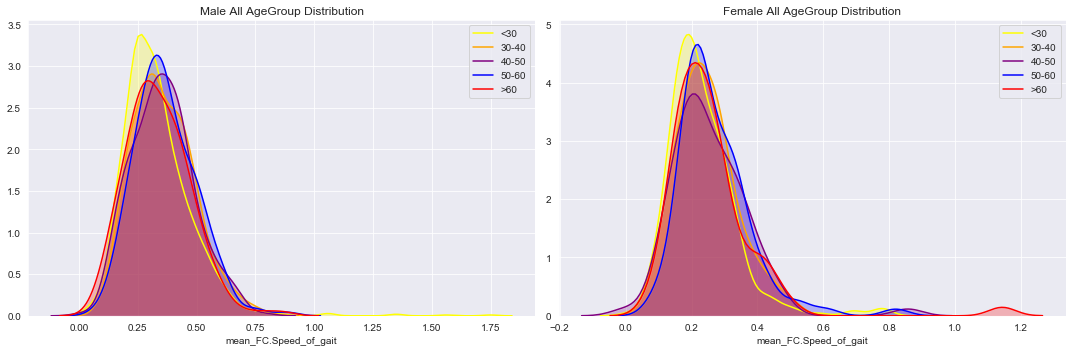

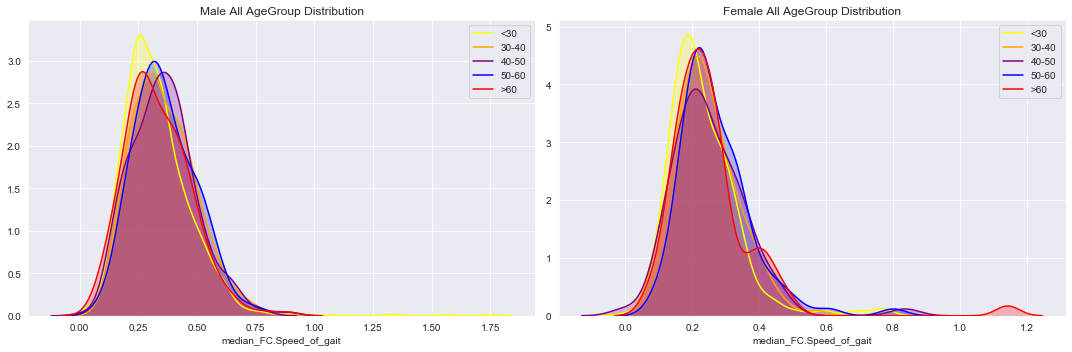

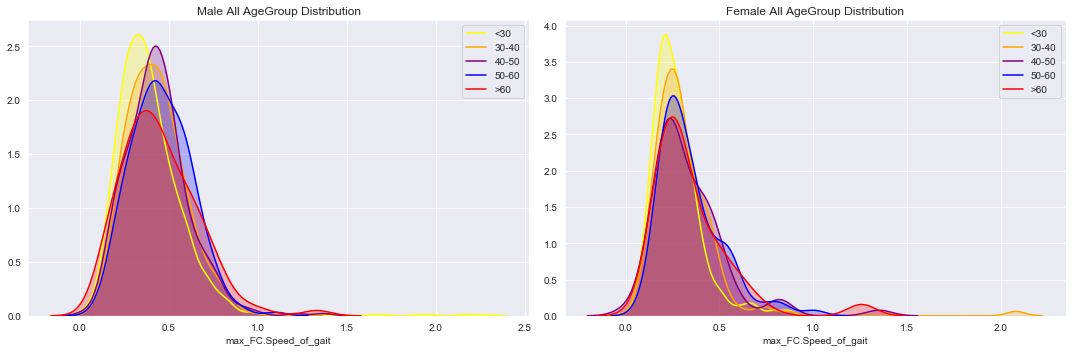

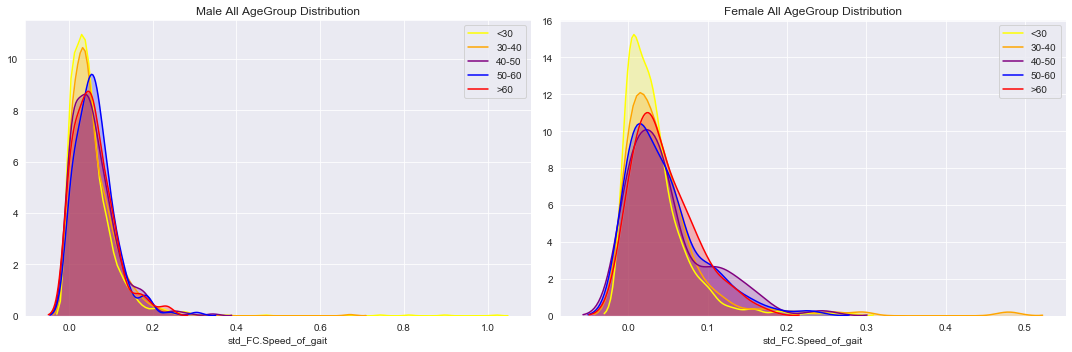

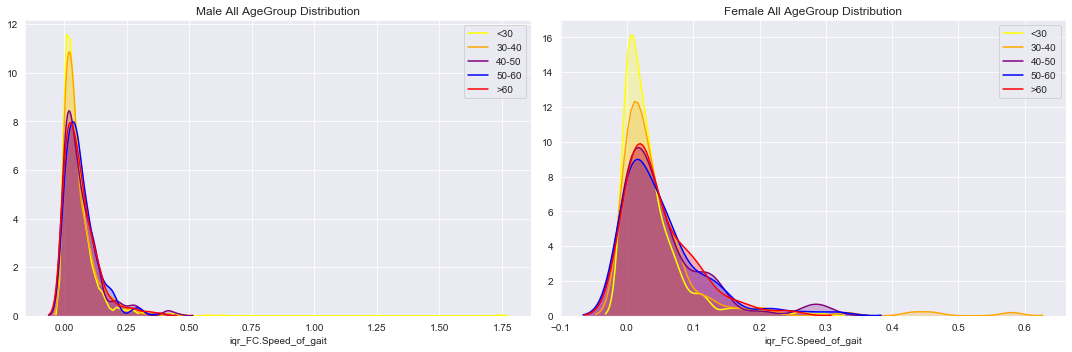

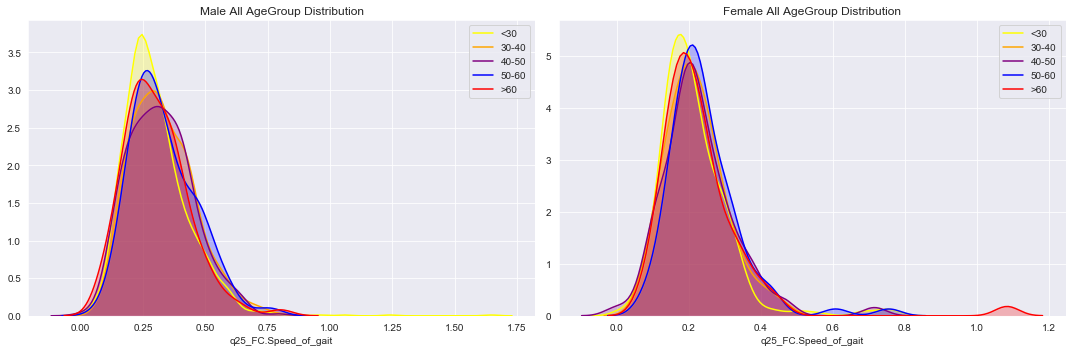

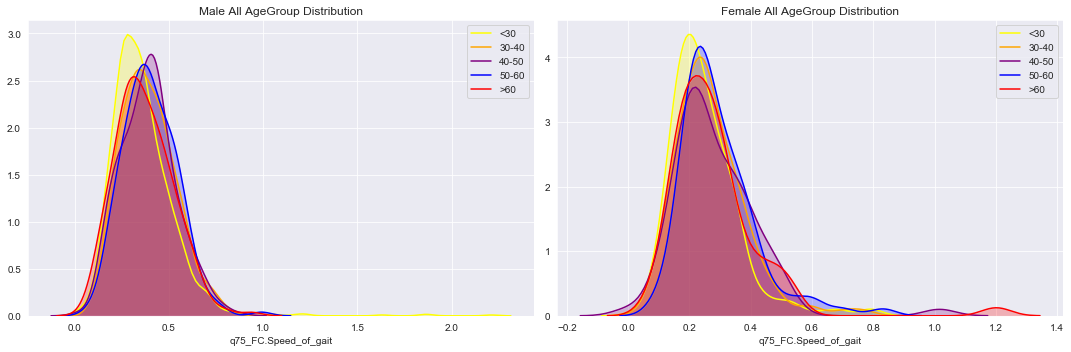

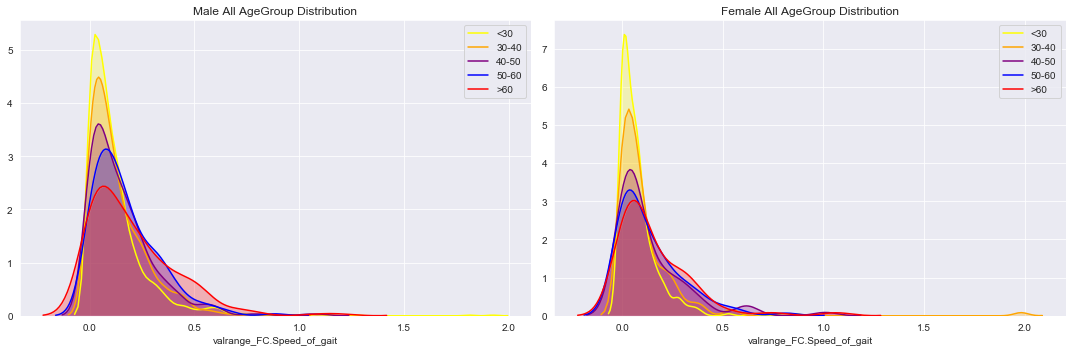

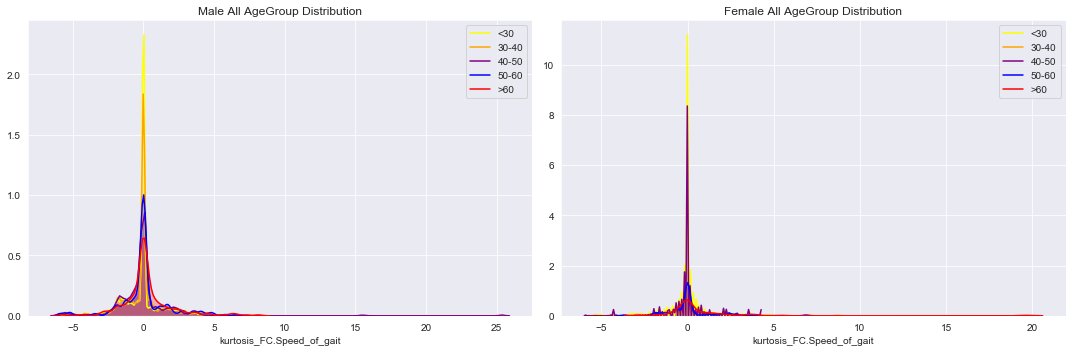

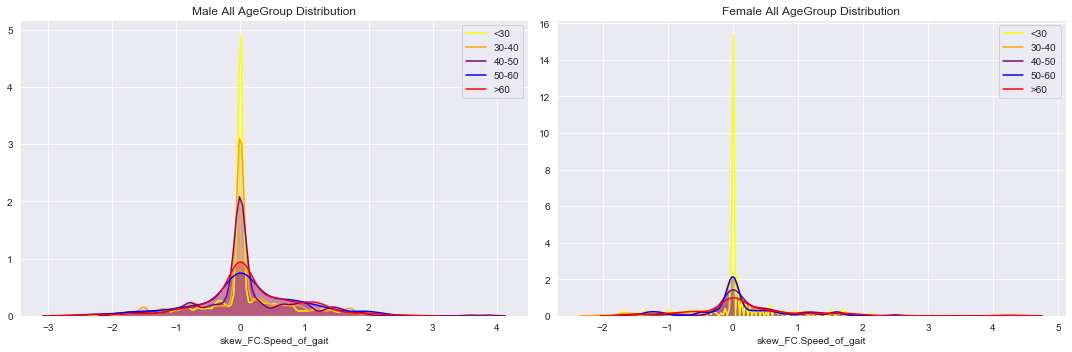

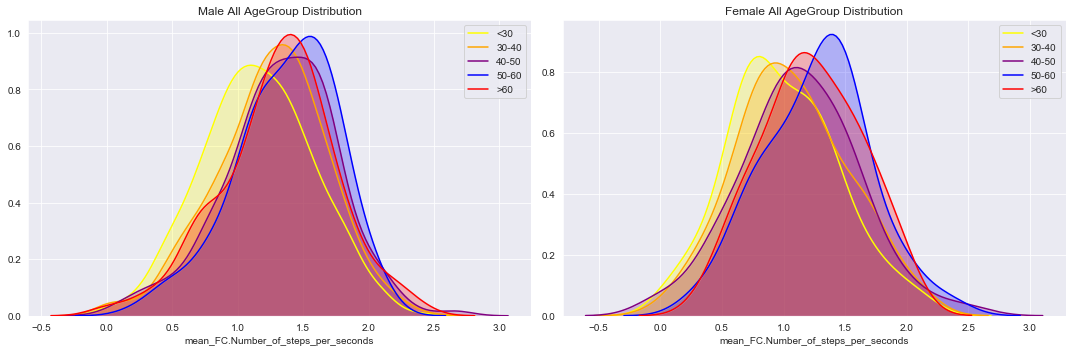

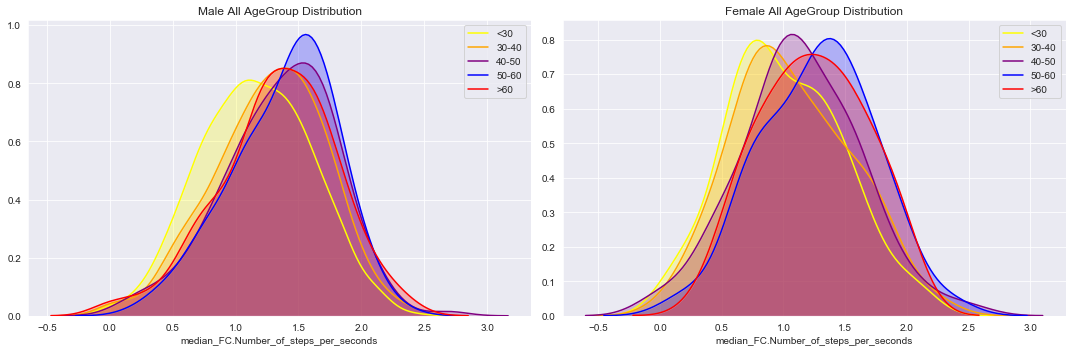

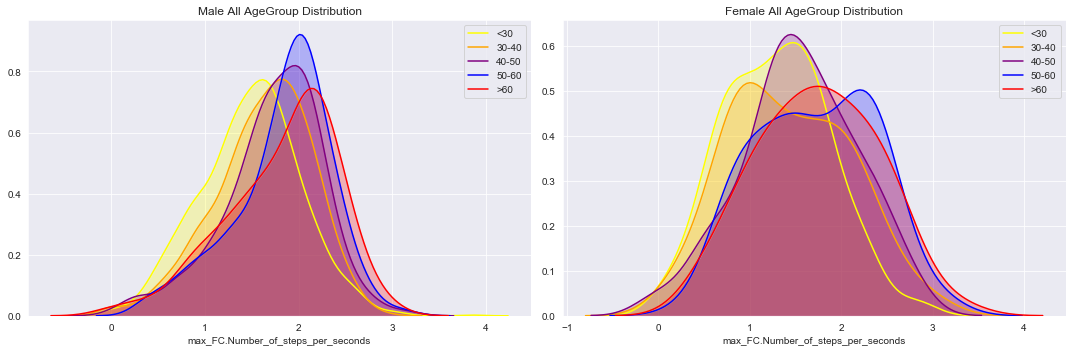

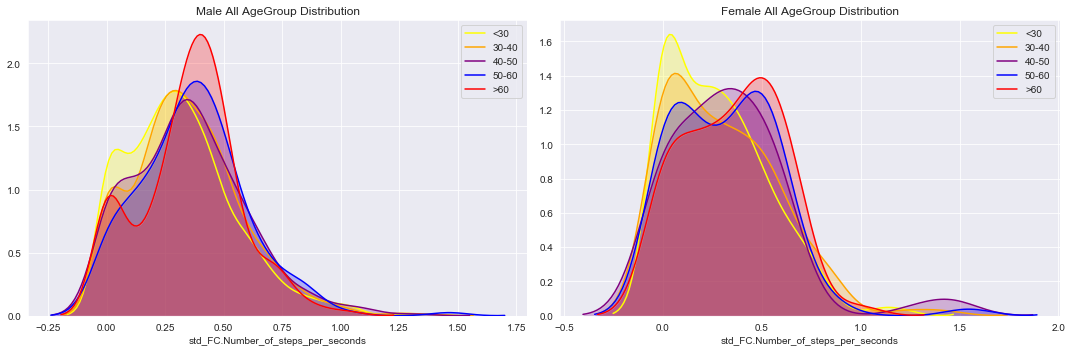

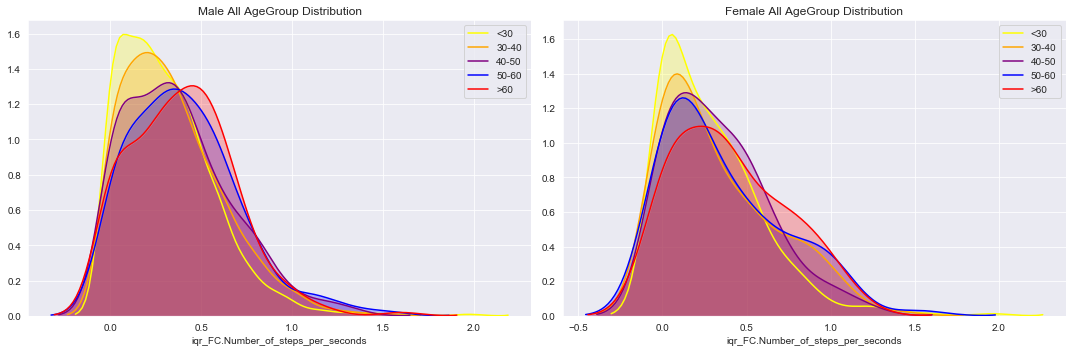

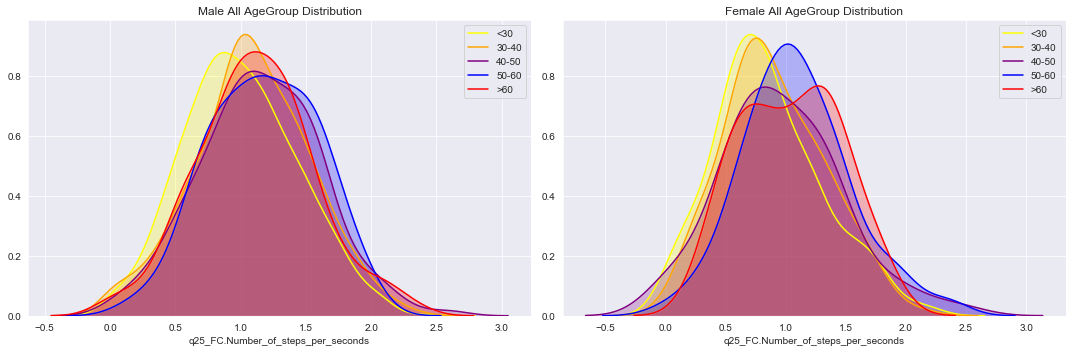

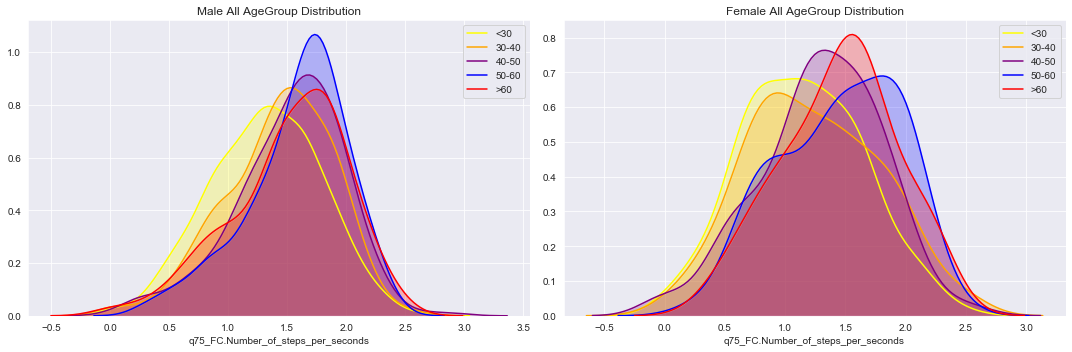

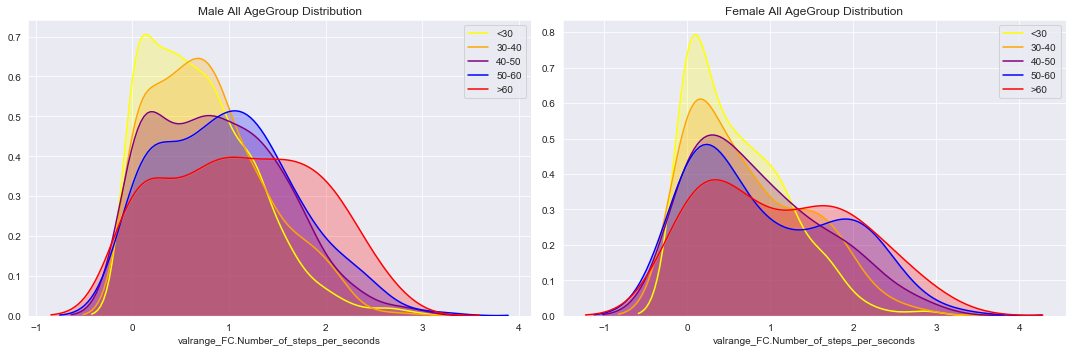

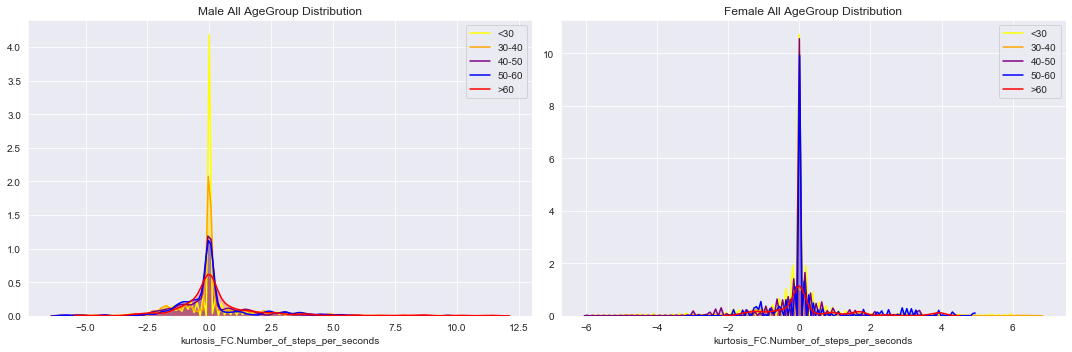

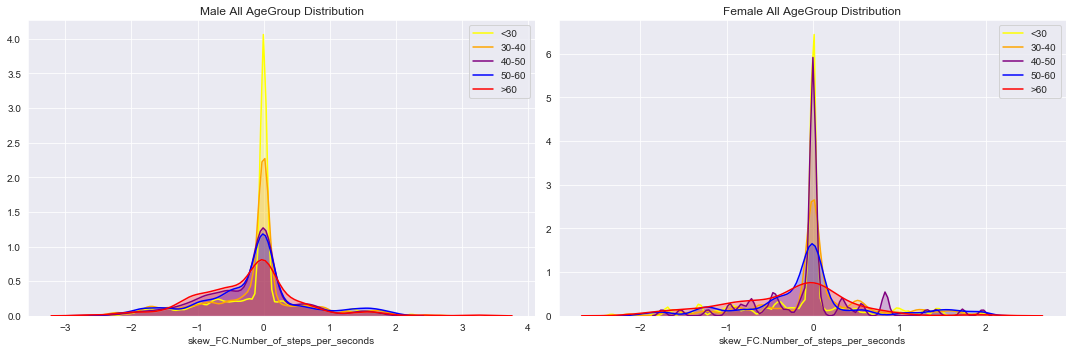

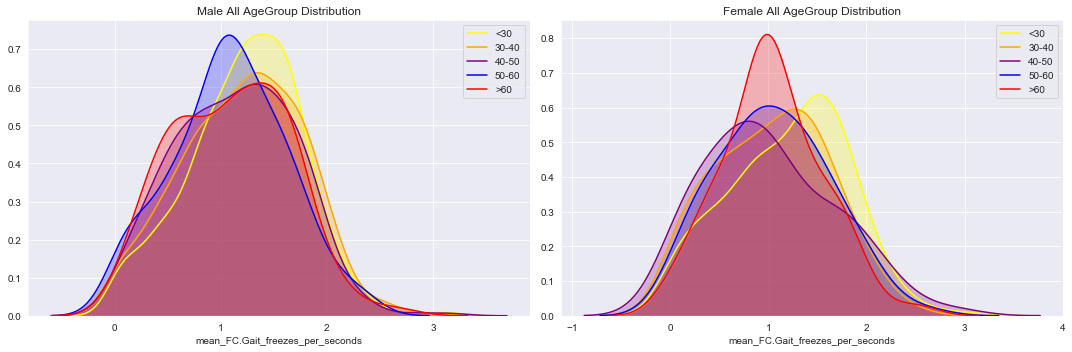

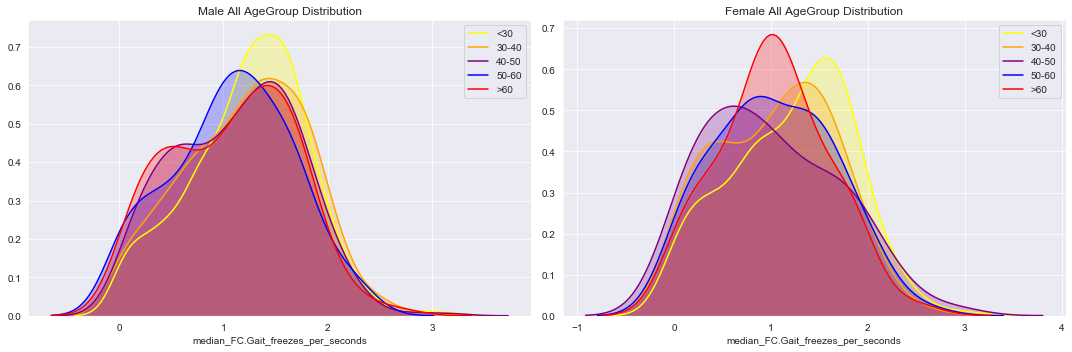

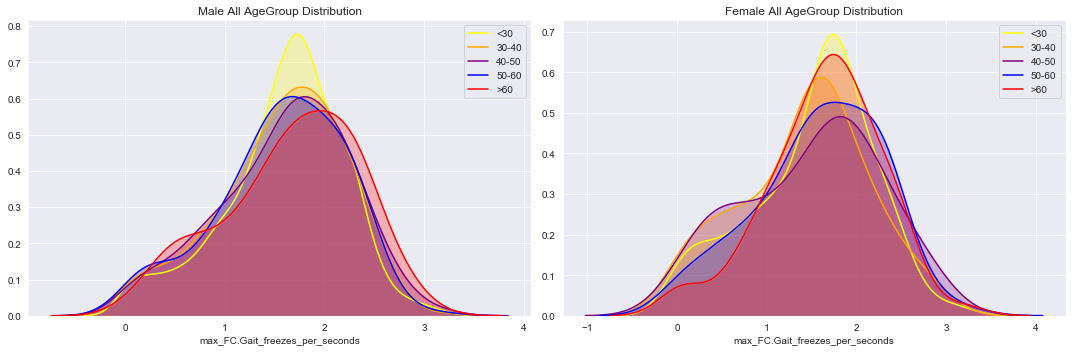

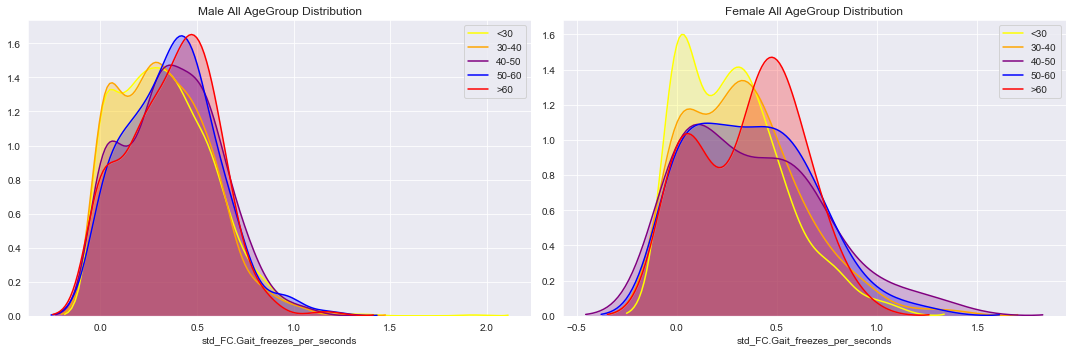

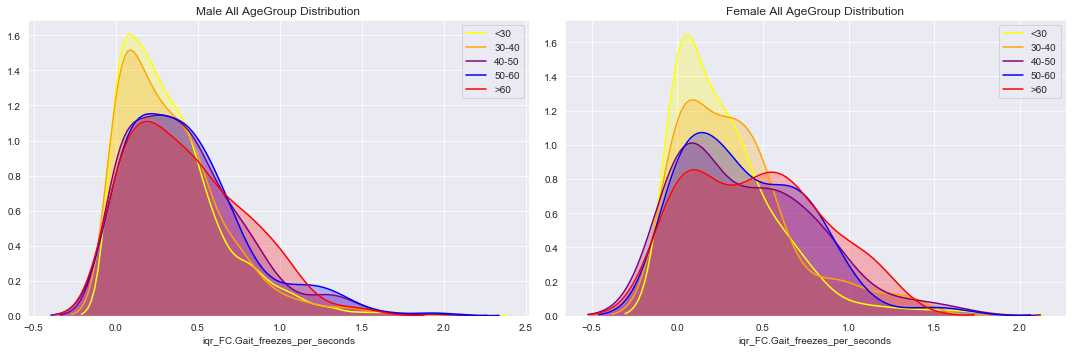

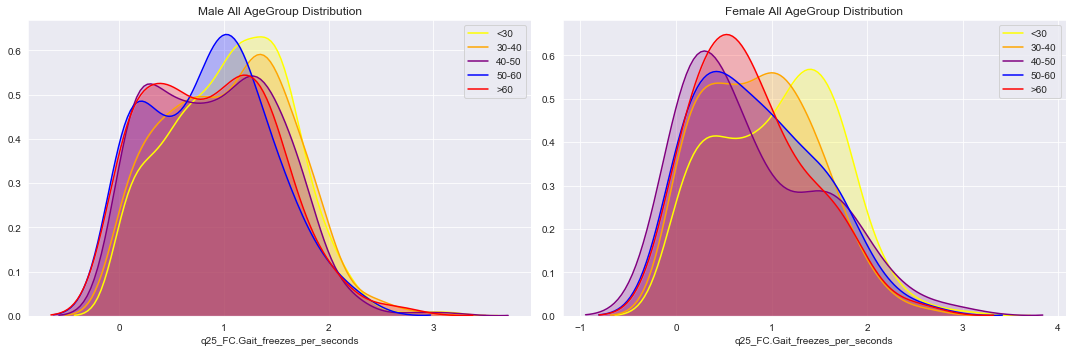

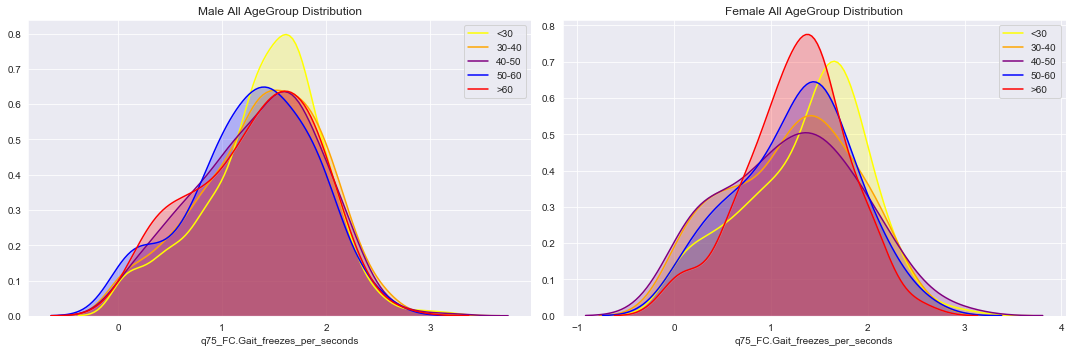

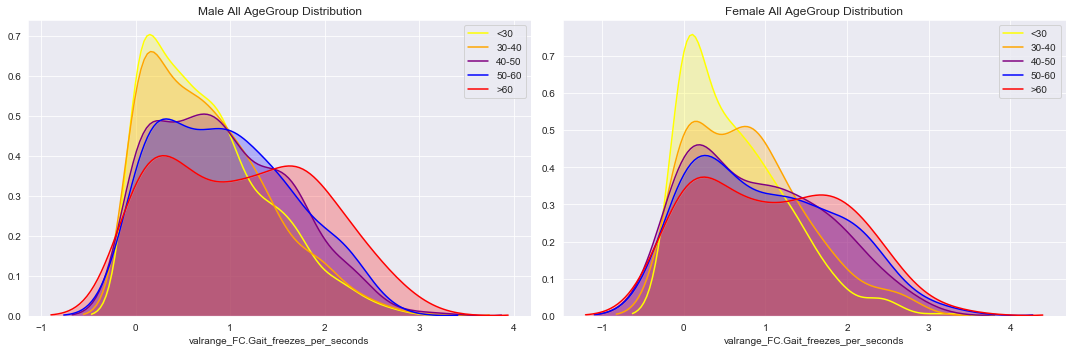

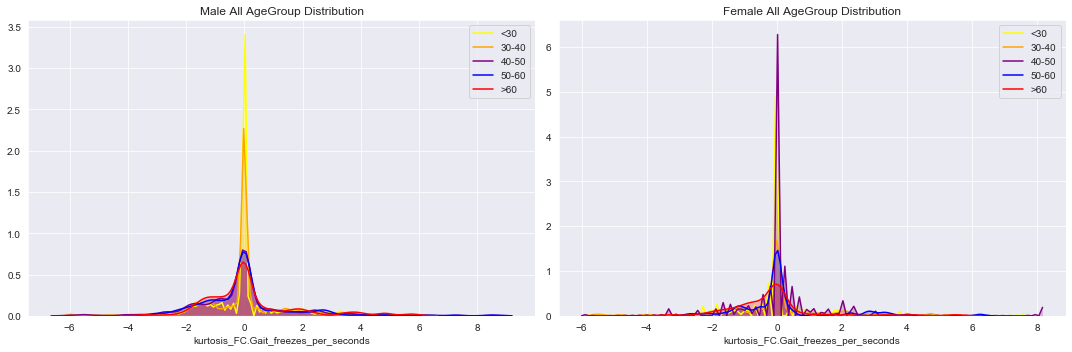

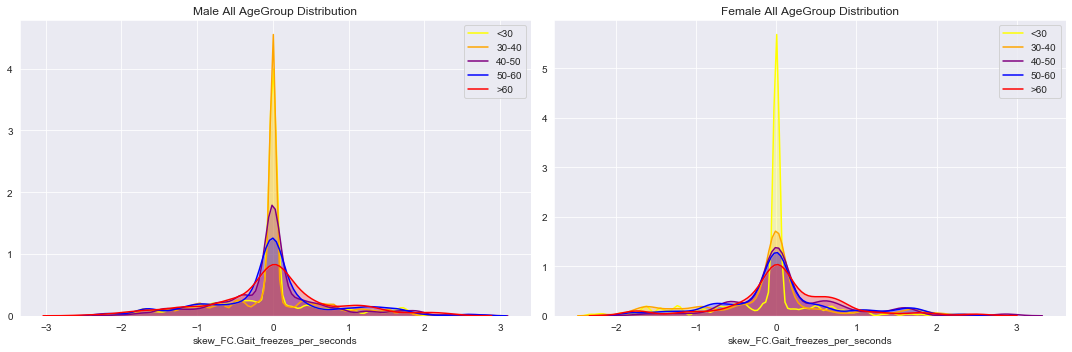

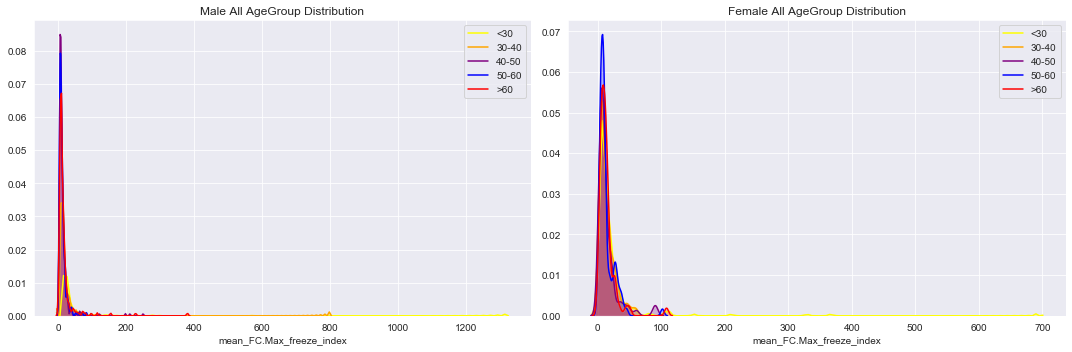

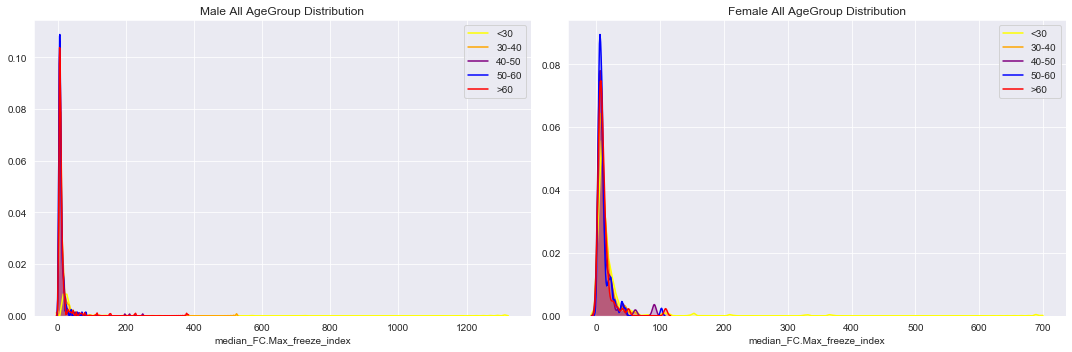

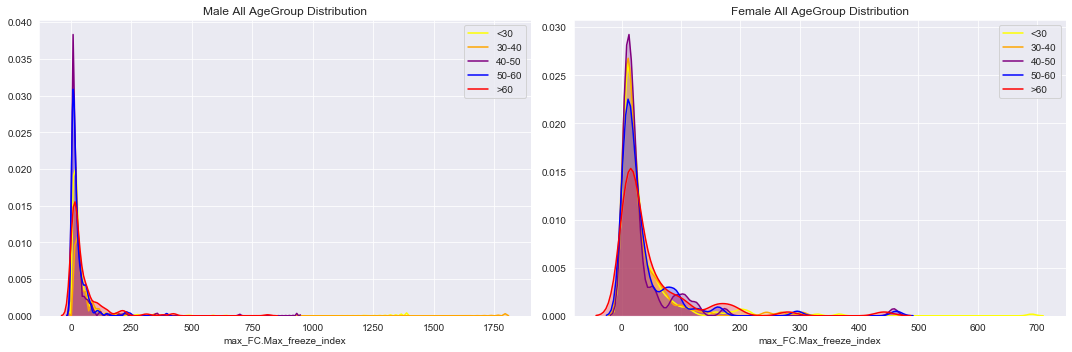

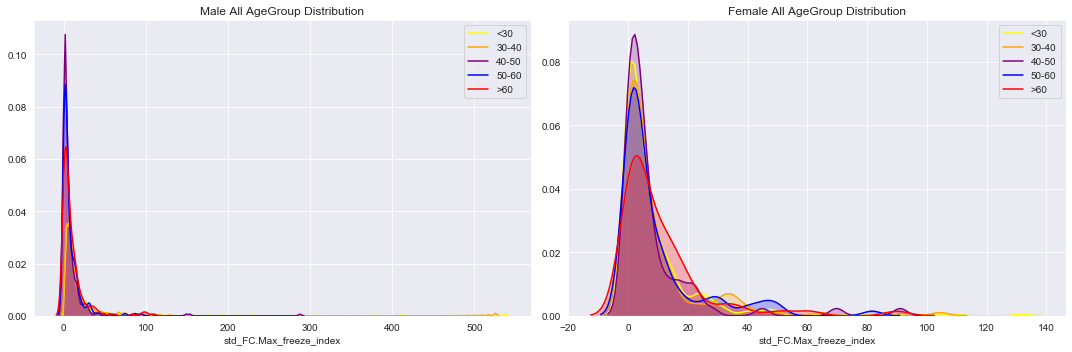

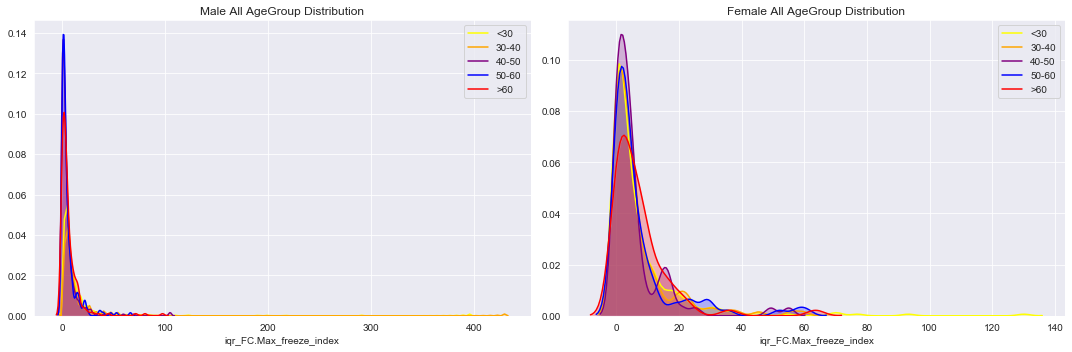

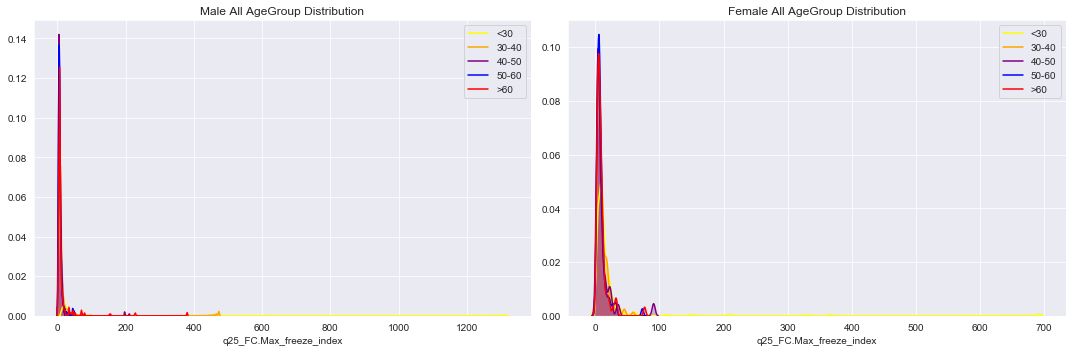

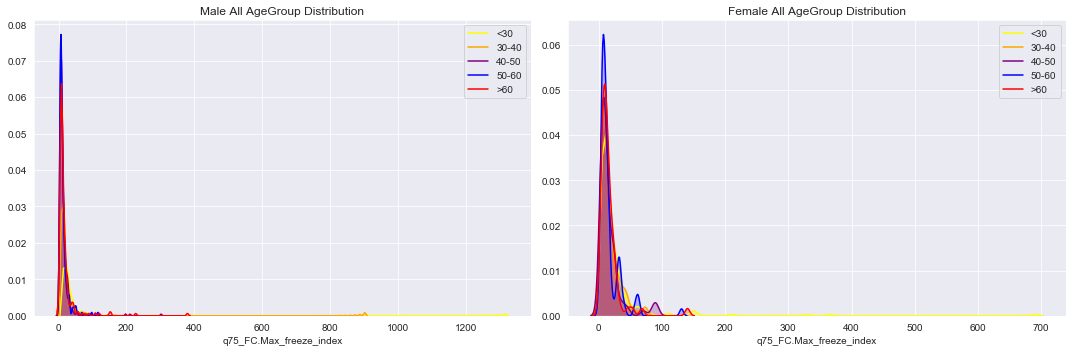

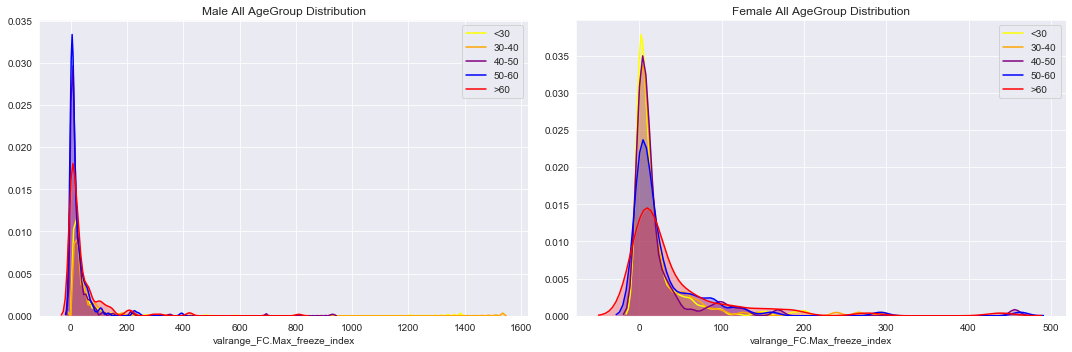

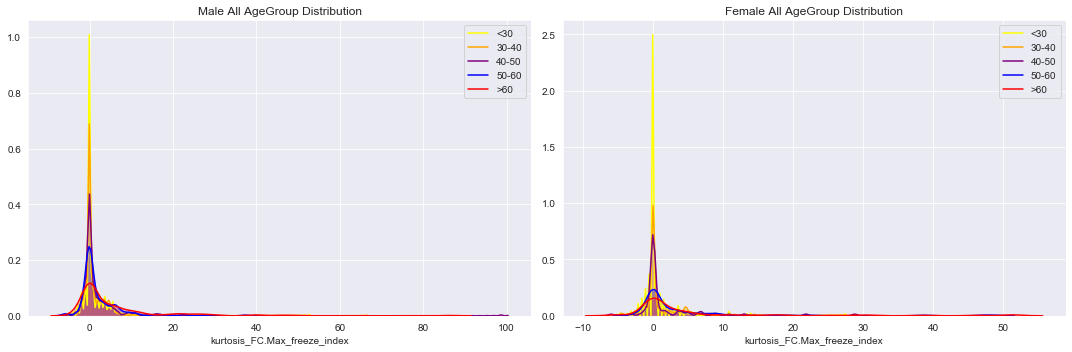

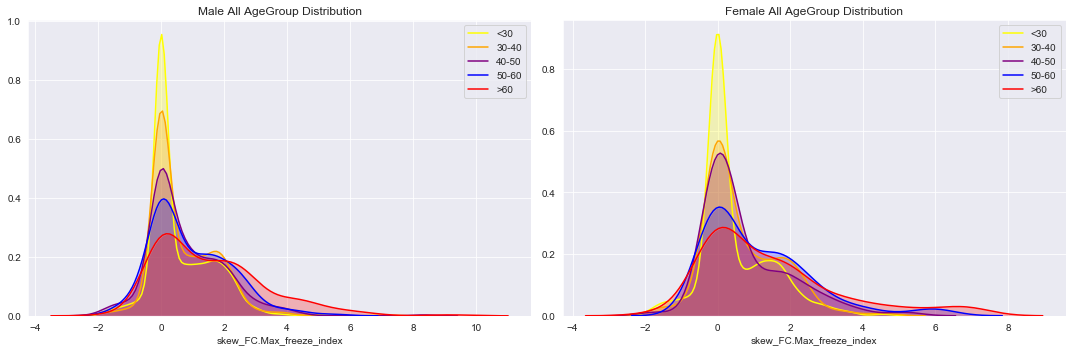

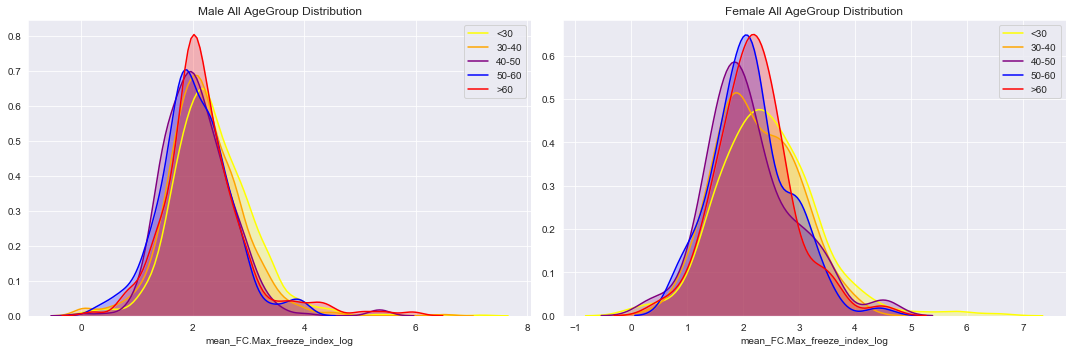

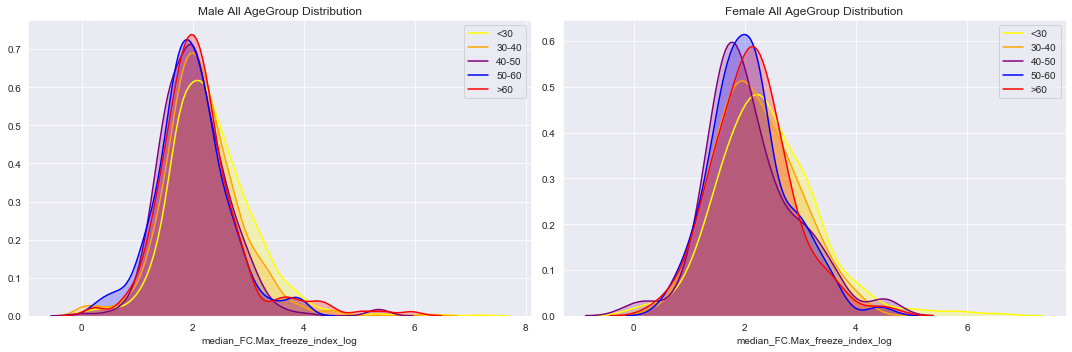

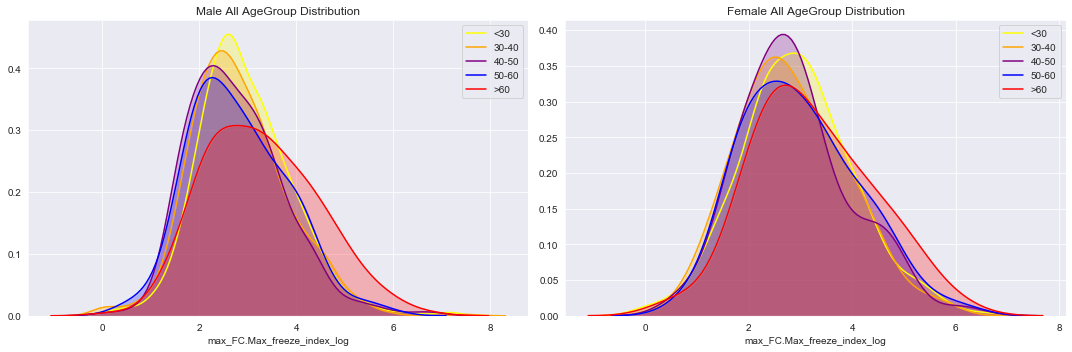

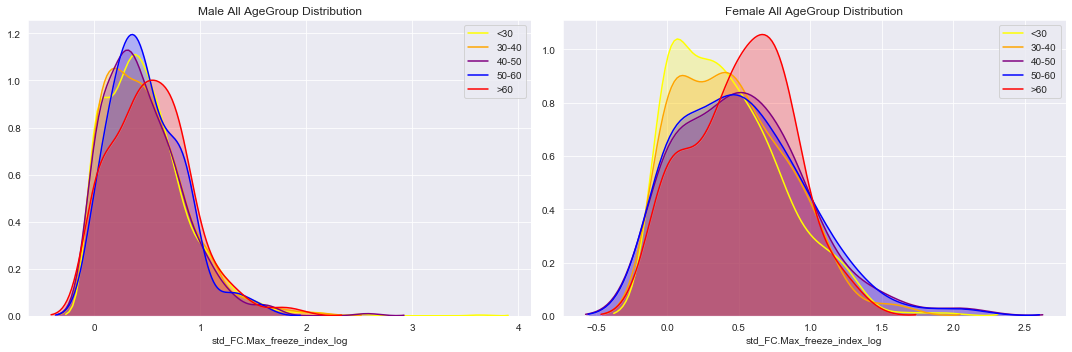

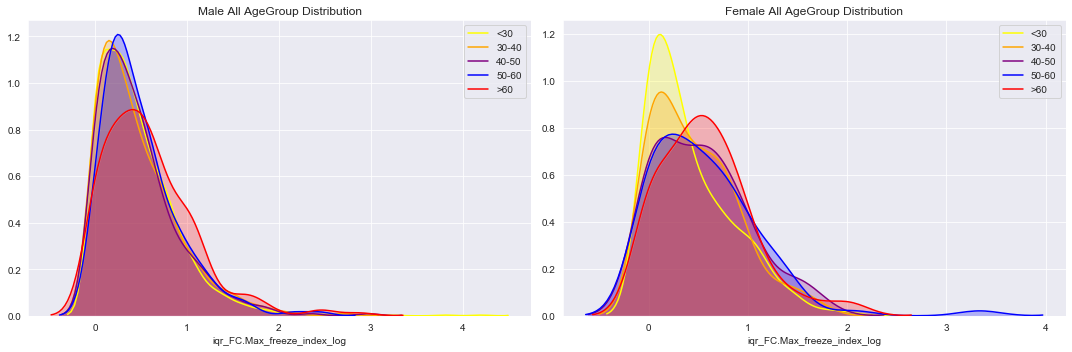

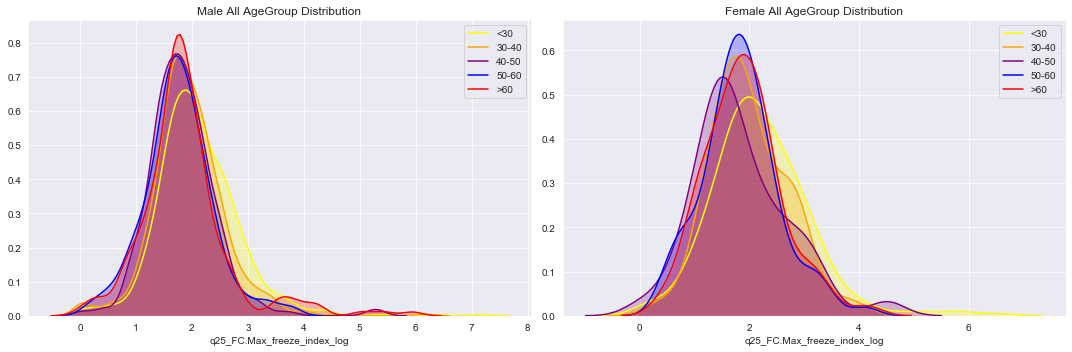

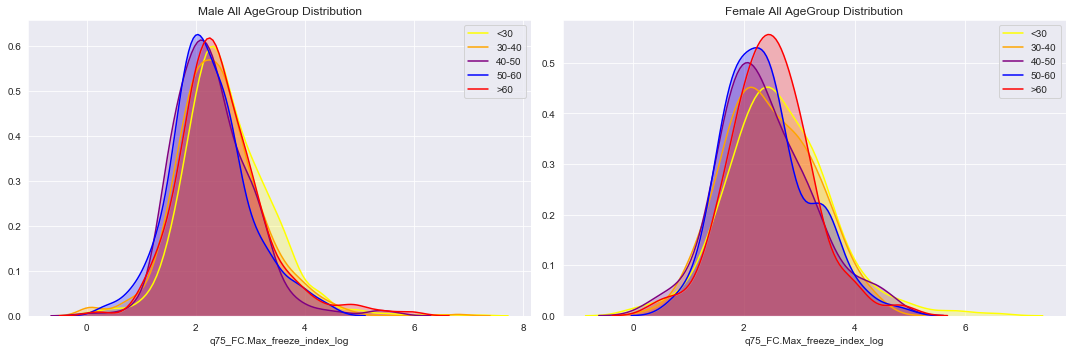

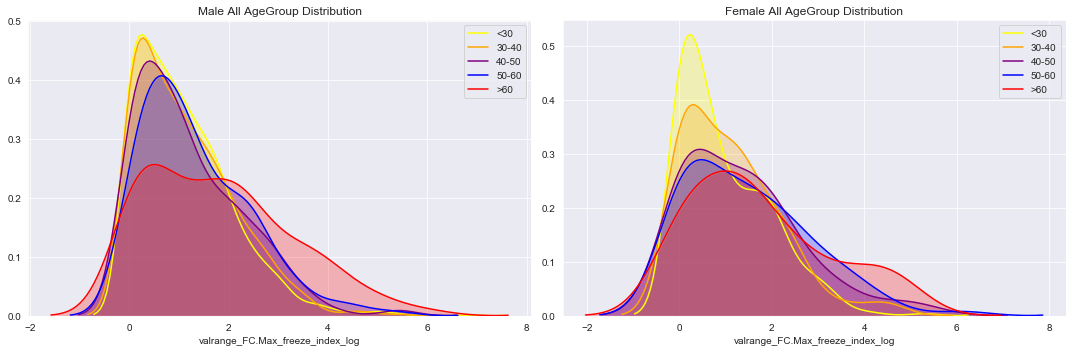

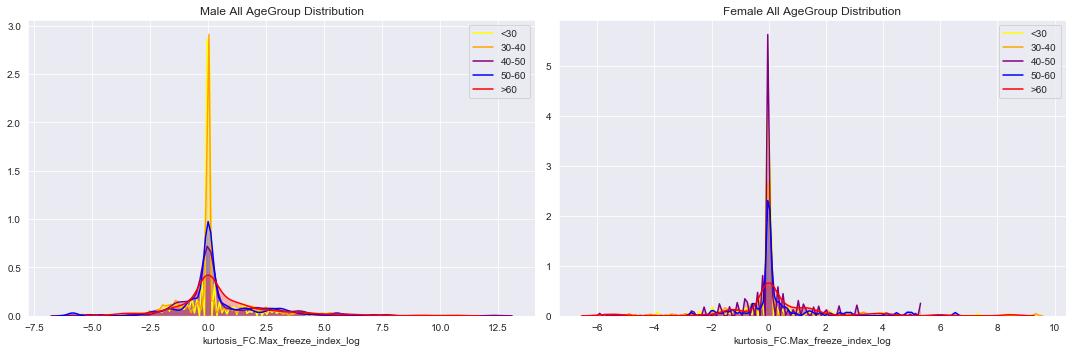

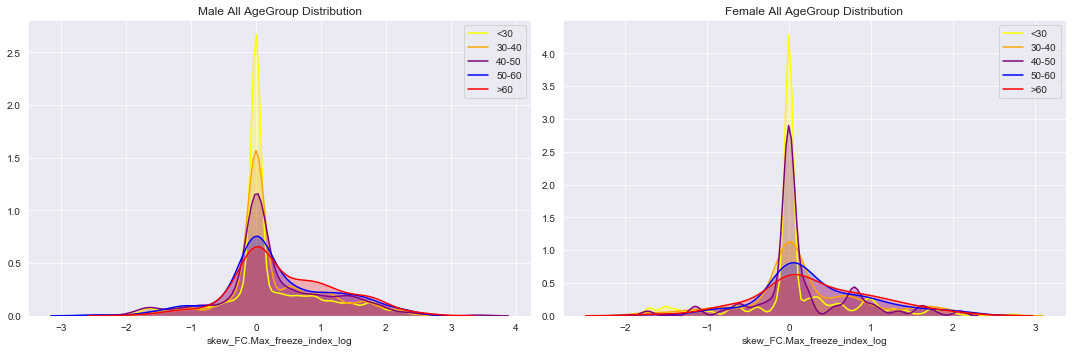

In [10]:
## Number of Steps
for feature in [feat for feat in grouped_data.columns if ("FC" in feat)]:
    viz.visualize_agegroups(grouped_data[(grouped_data["is_control"] == 1)], feature)

### 2.) Distribution of Control vs MS vs PD of Active Data

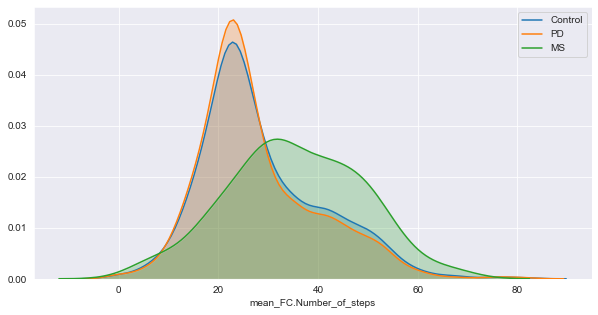

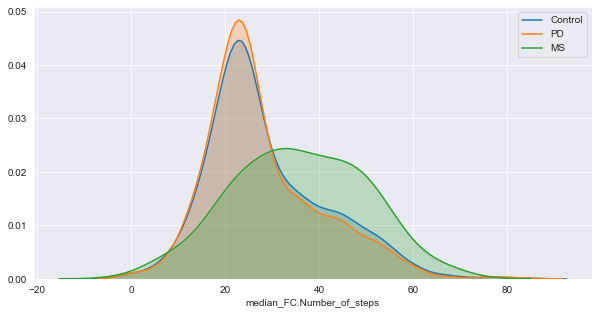

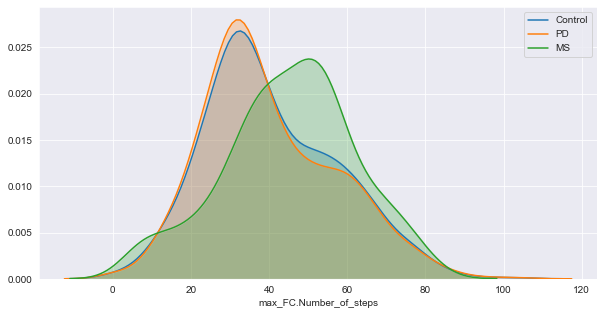

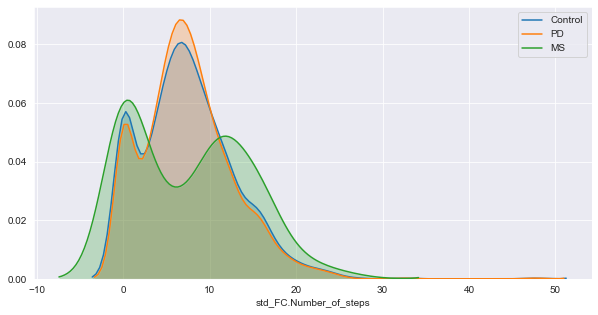

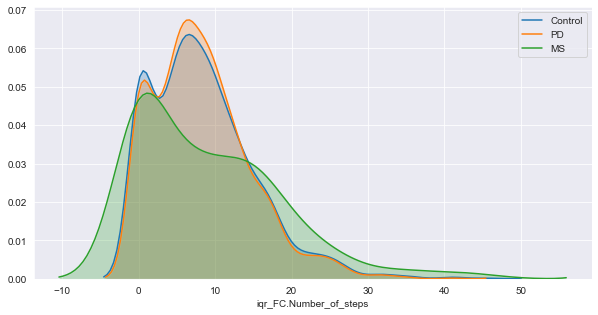

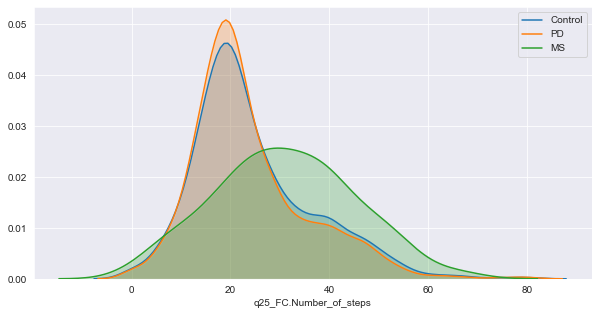

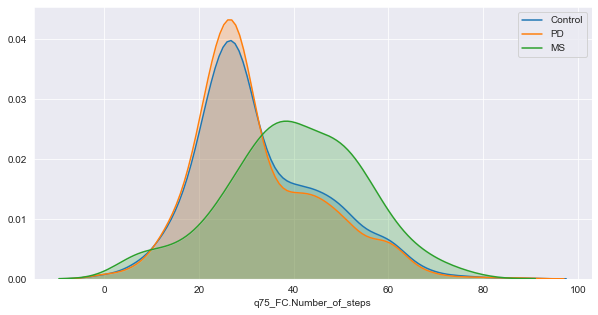

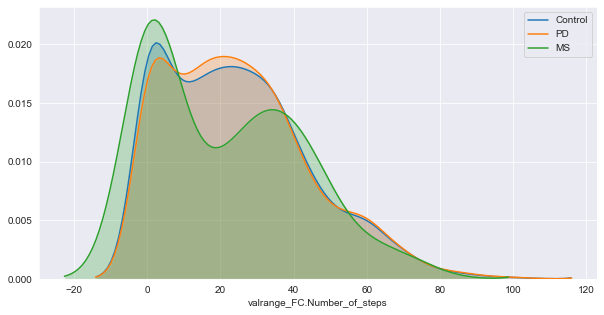

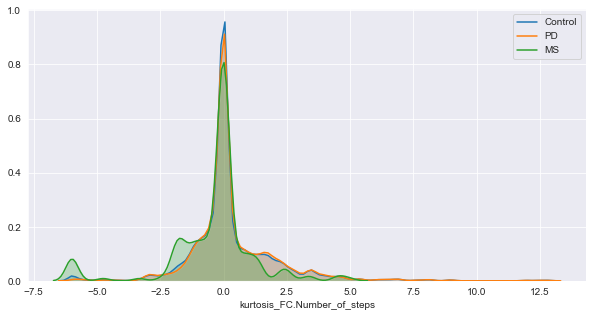

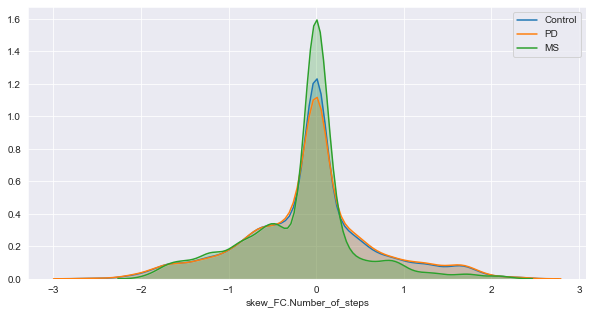

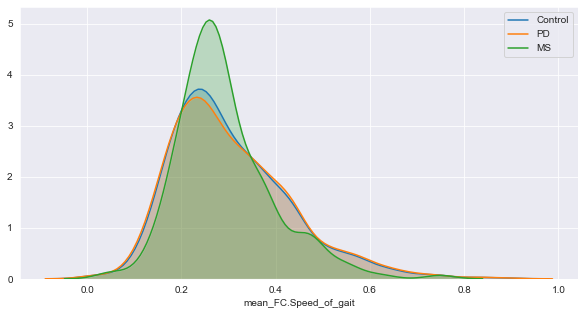

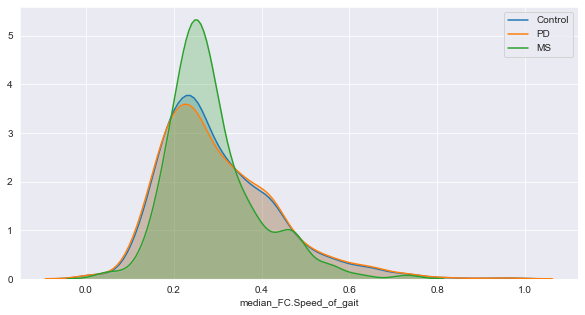

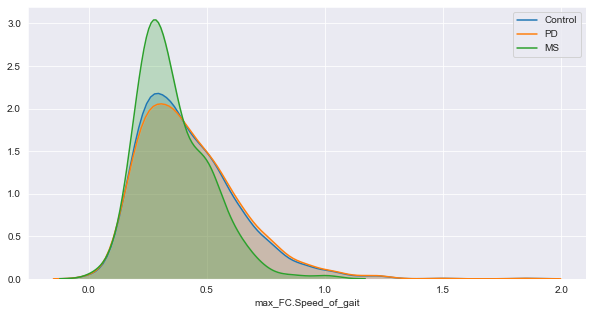

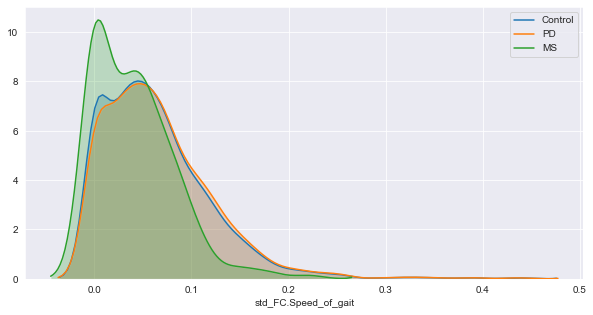

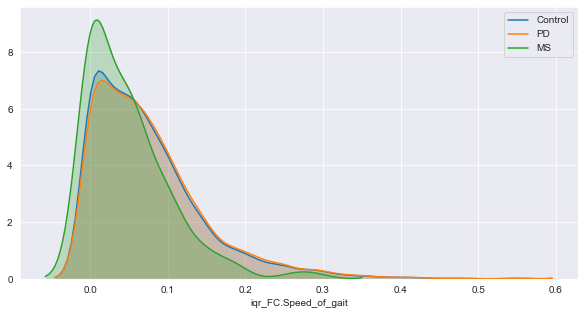

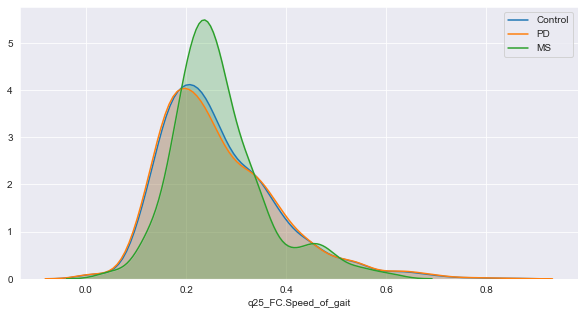

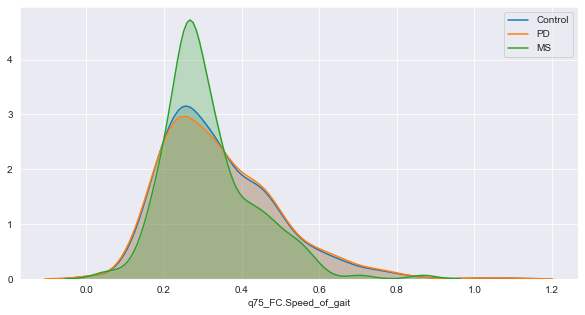

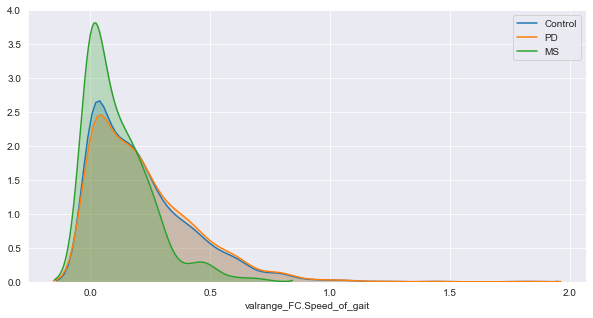

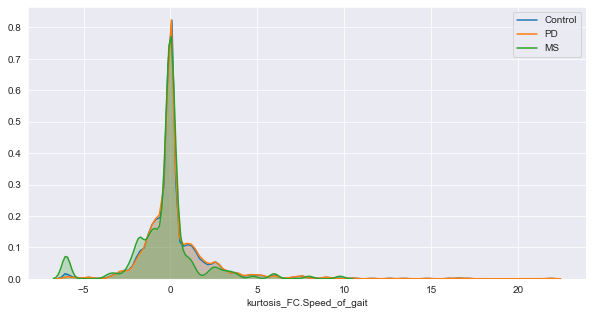

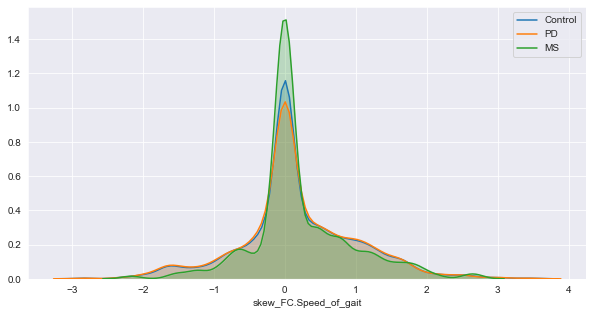

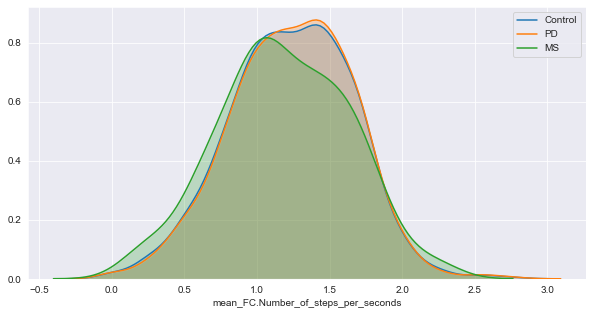

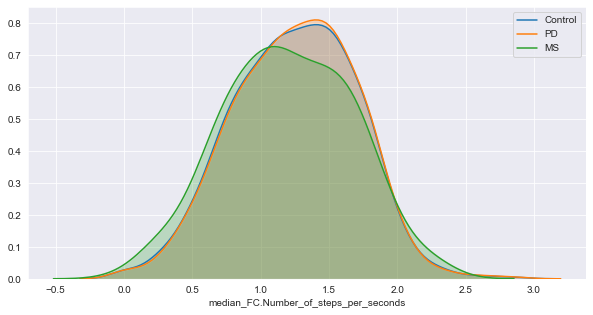

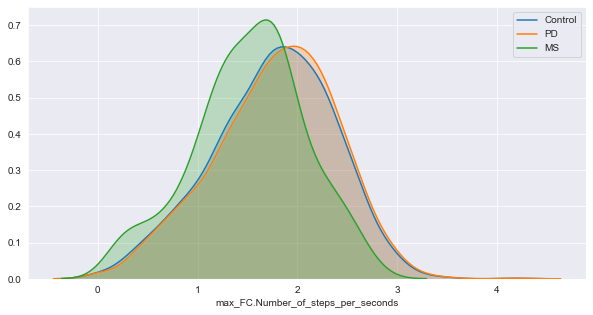

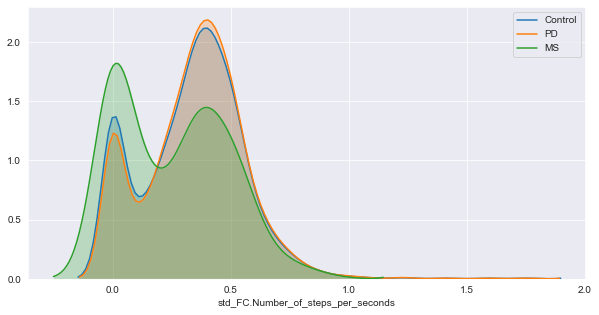

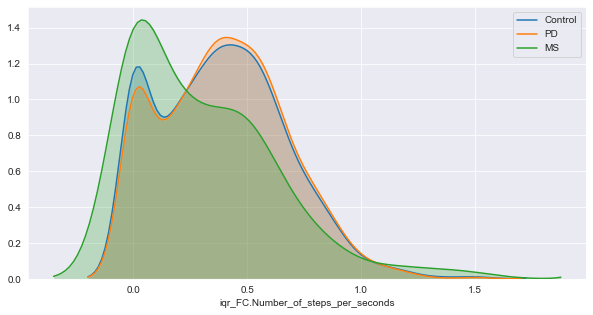

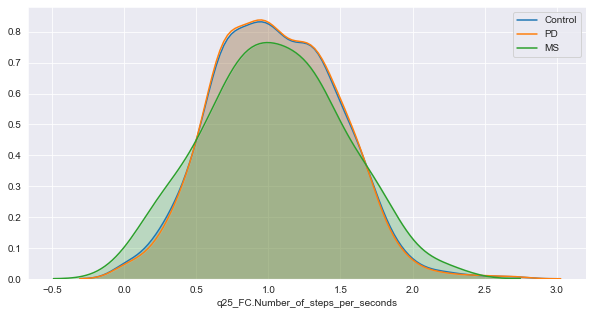

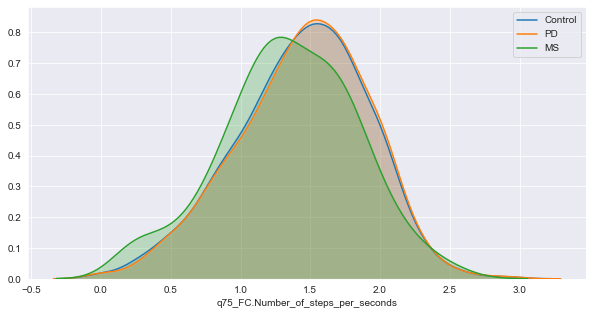

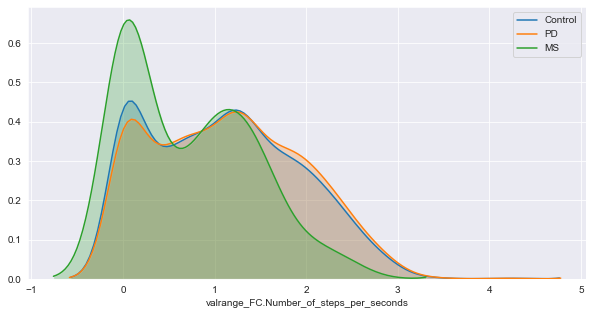

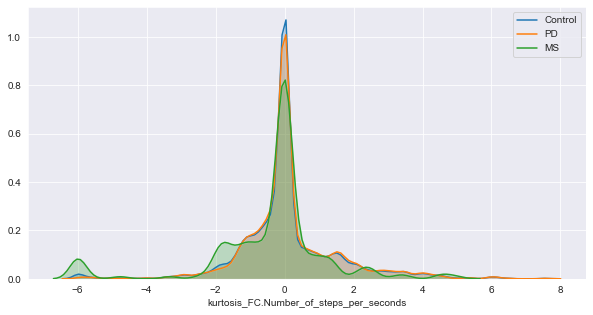

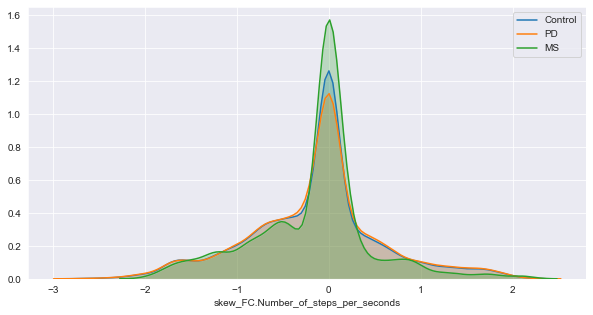

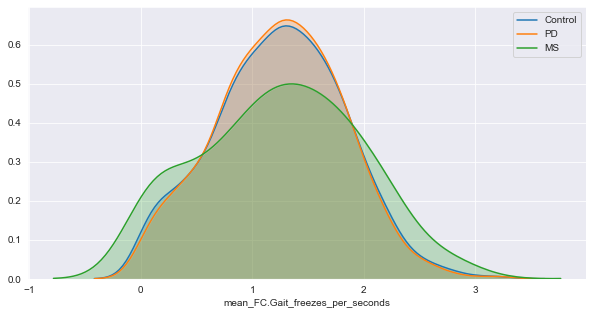

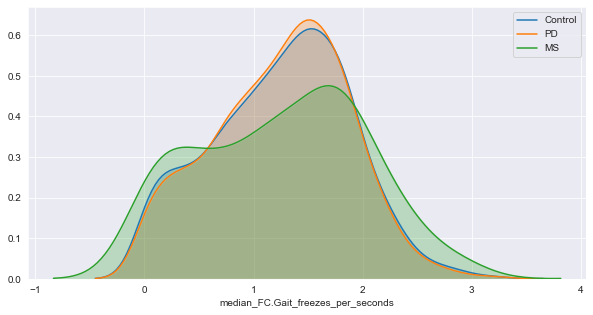

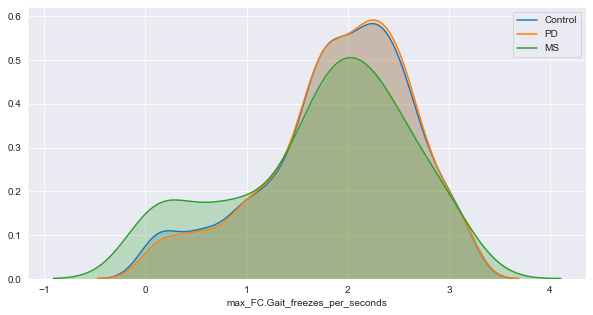

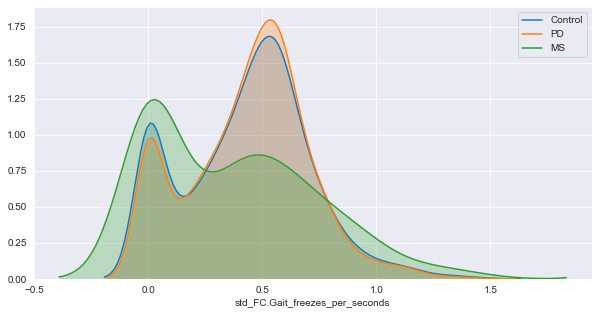

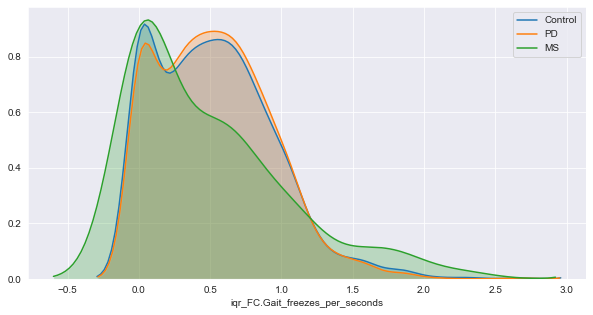

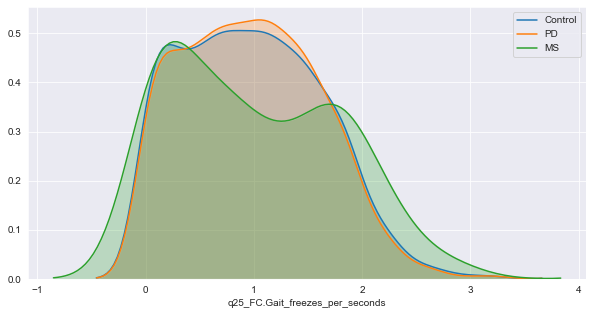

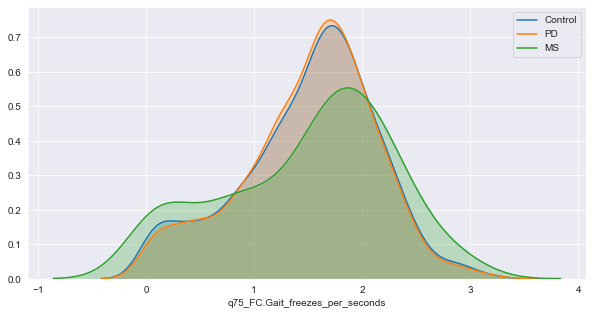

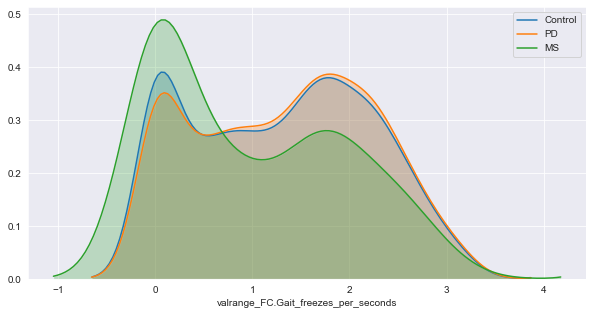

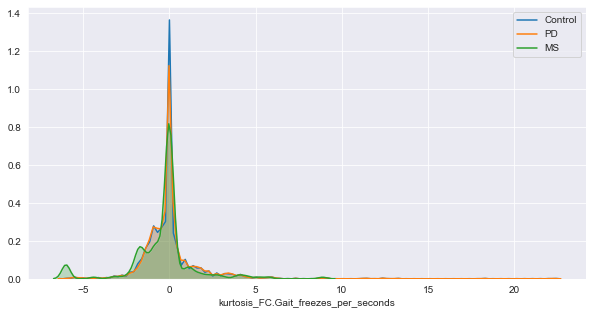

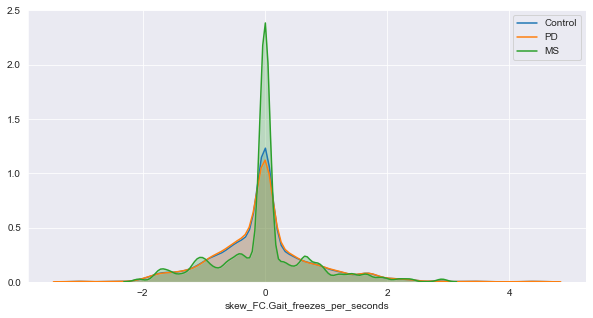

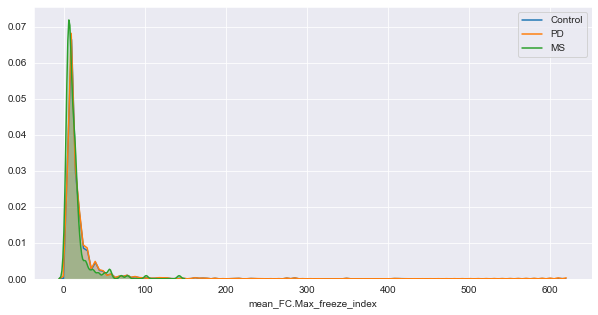

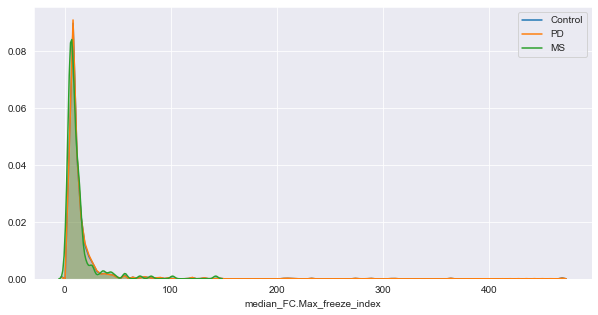

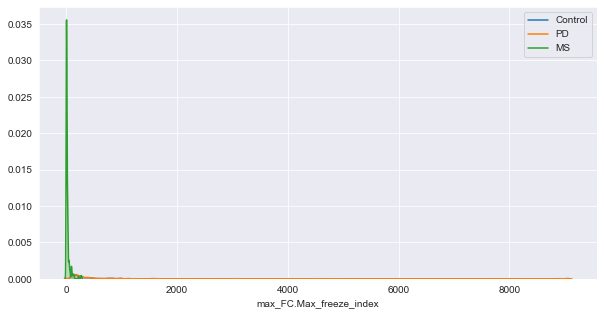

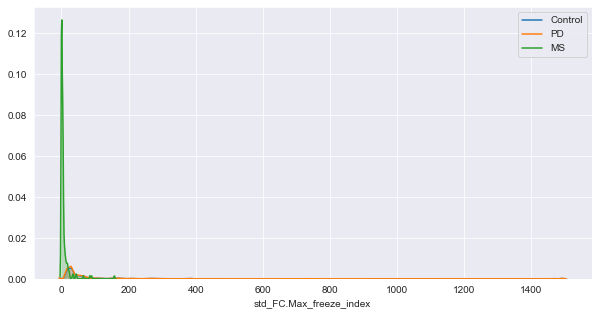

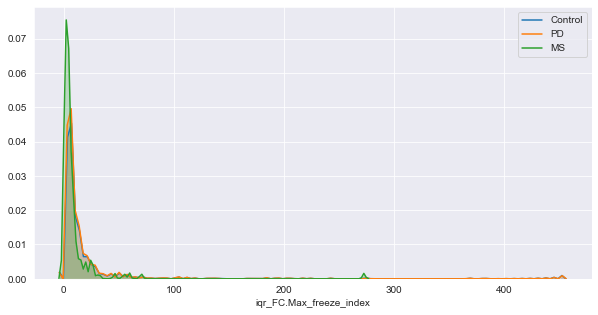

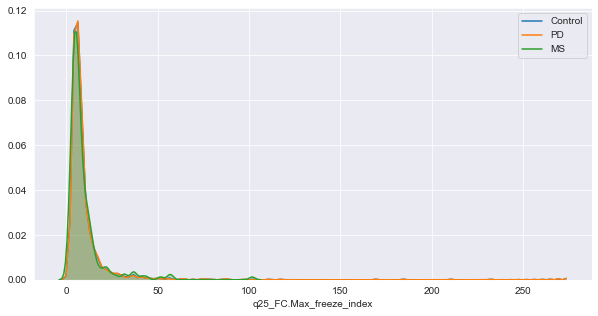

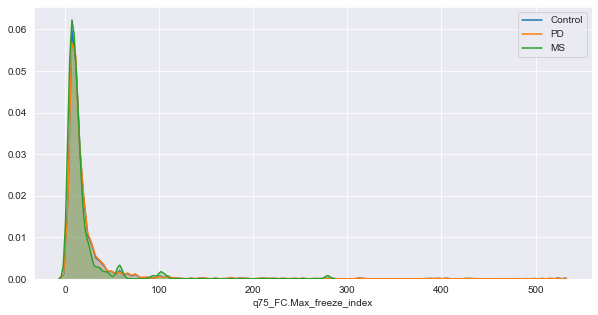

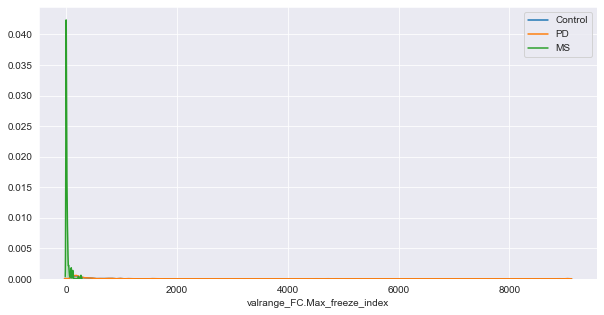

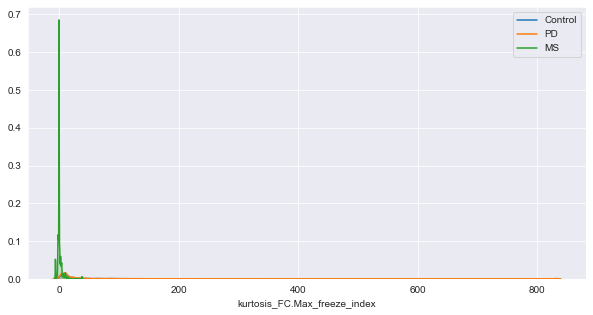

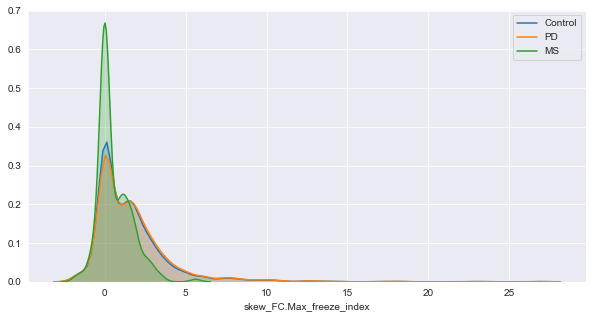

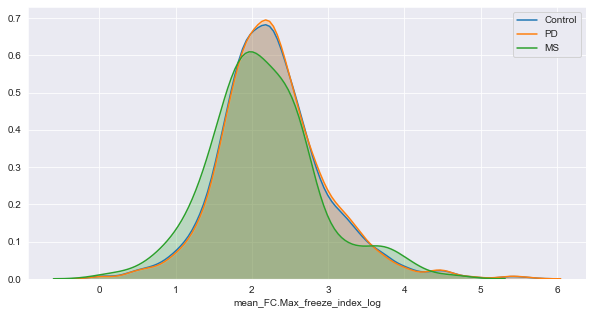

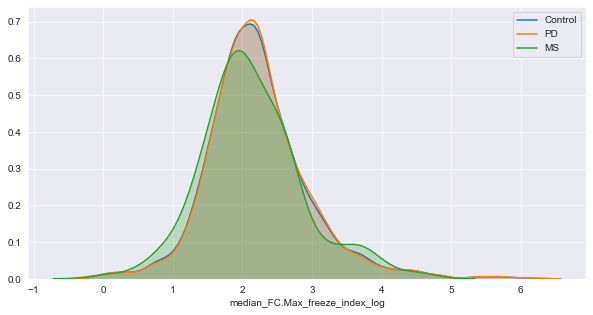

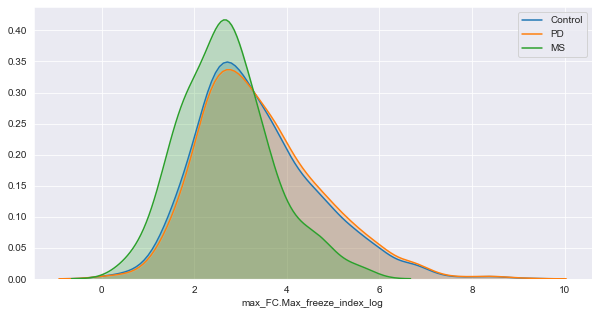

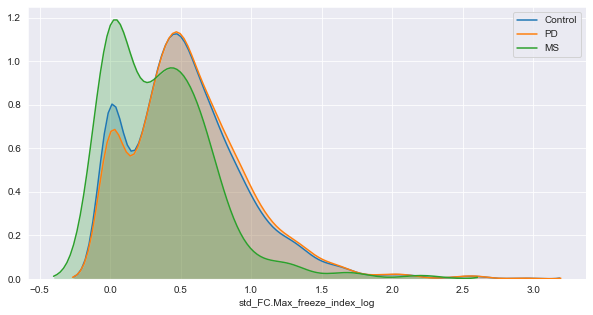

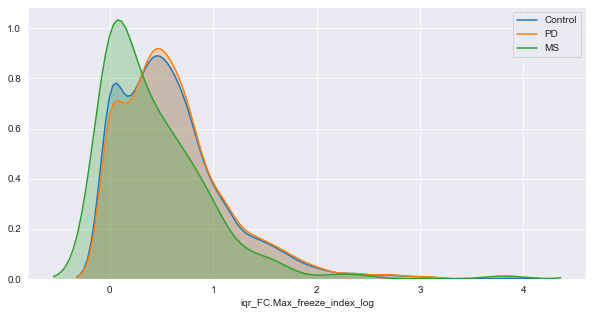

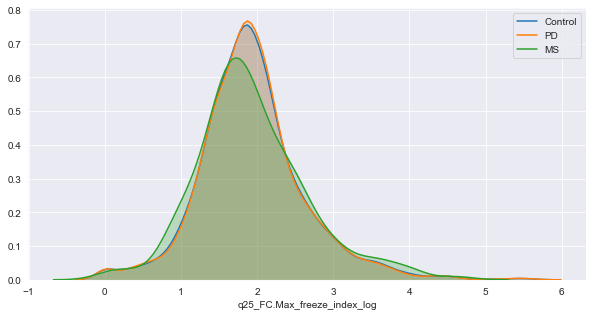

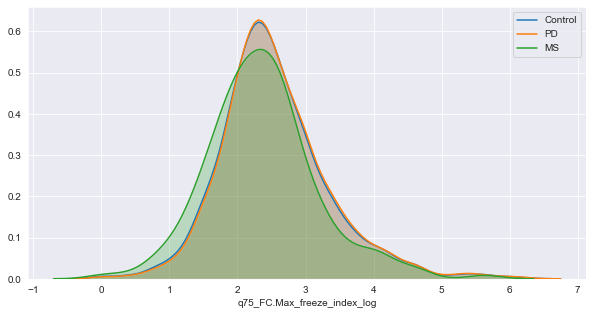

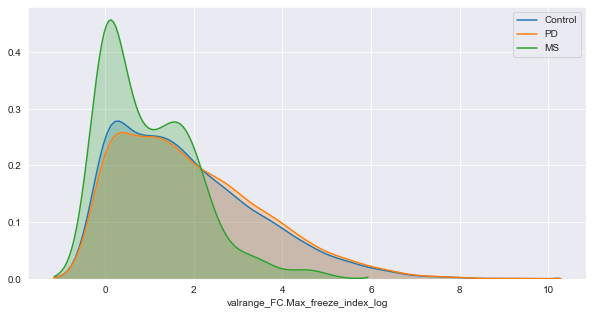

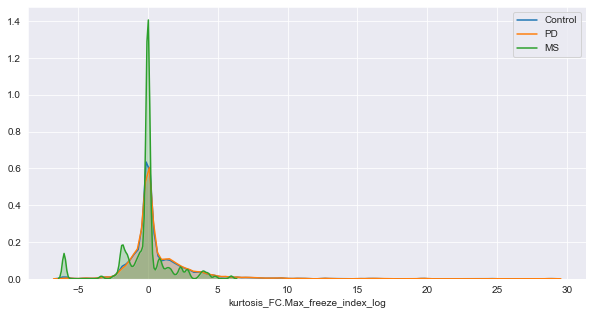

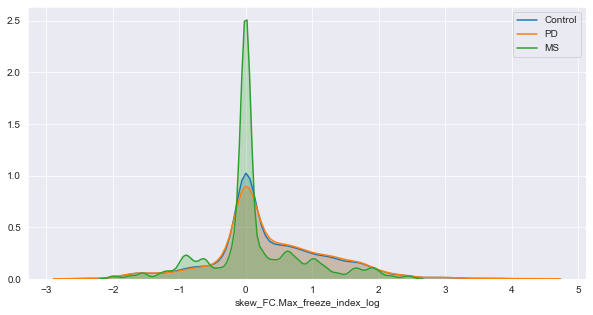

In [11]:
for feature in [feat for feat in grouped_data.columns if "FC" in feat]:
    viz.visualize_groupComparisons(grouped_data[grouped_data["version"] != "mpower_passive"], feature)

### 3.) PD-ACTIVE vs PD-PASSIVE 

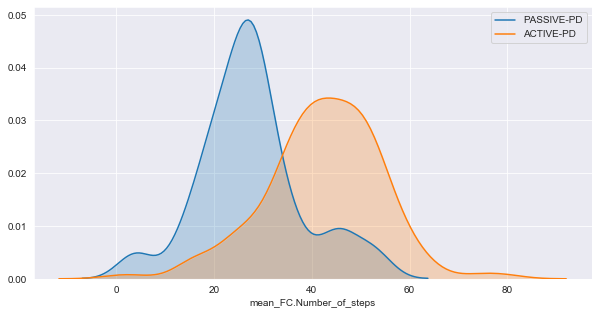

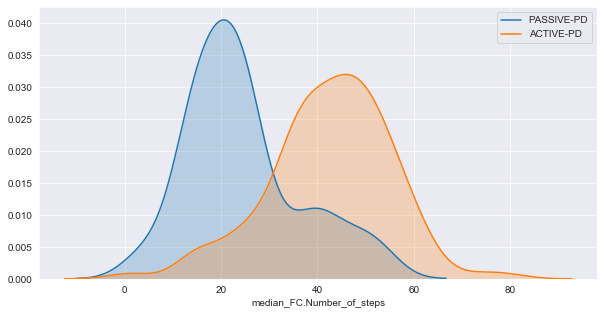

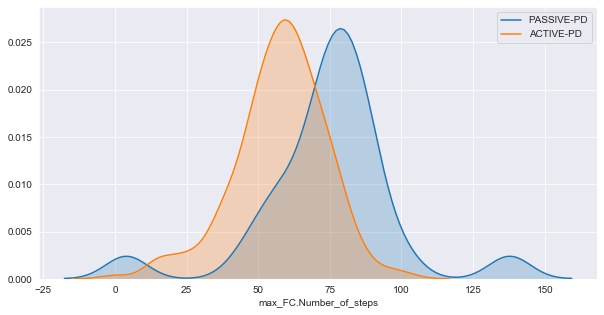

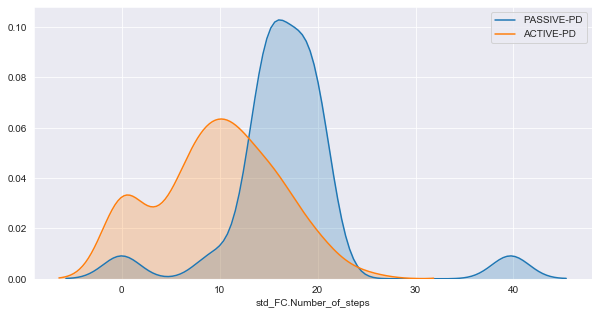

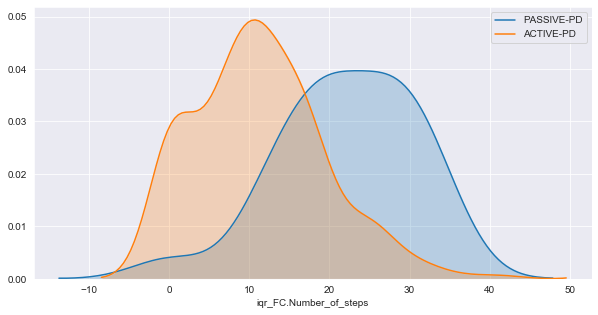

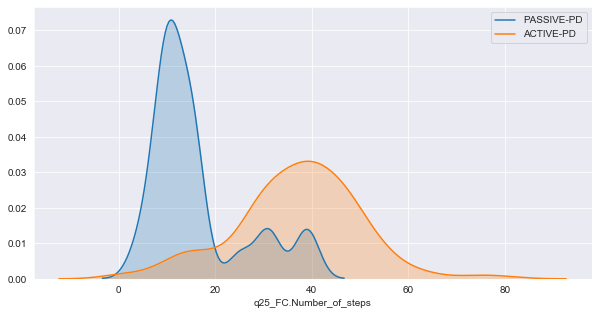

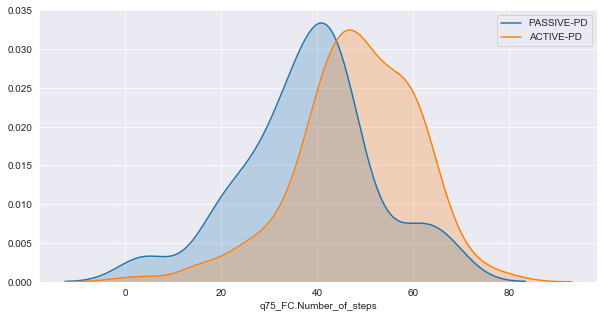

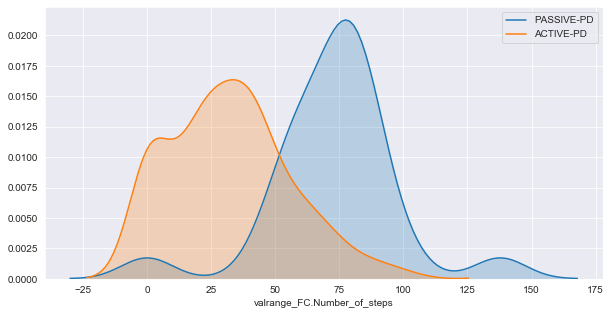

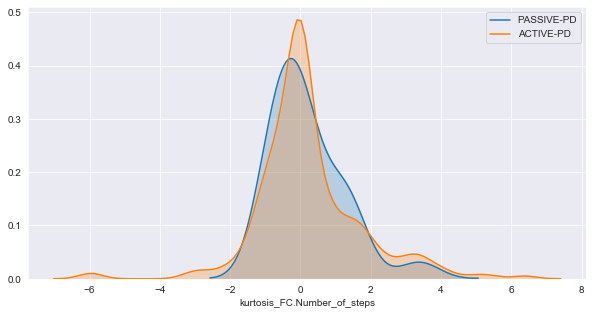

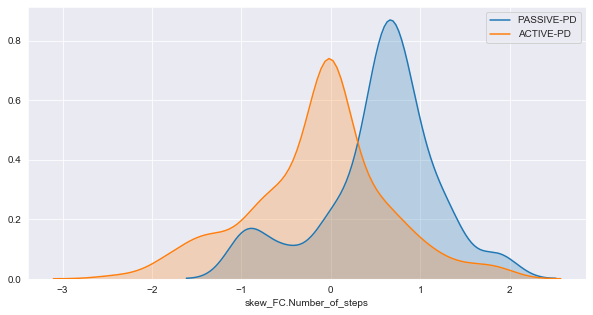

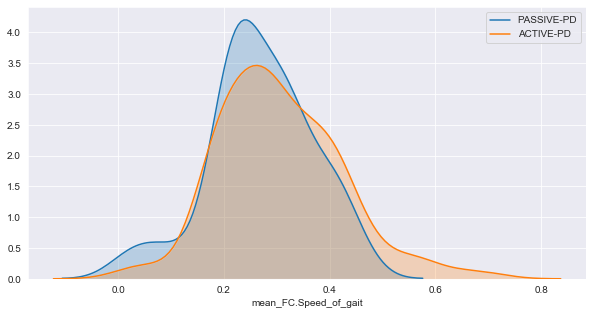

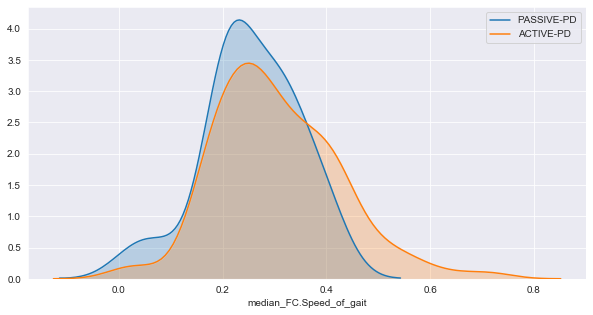

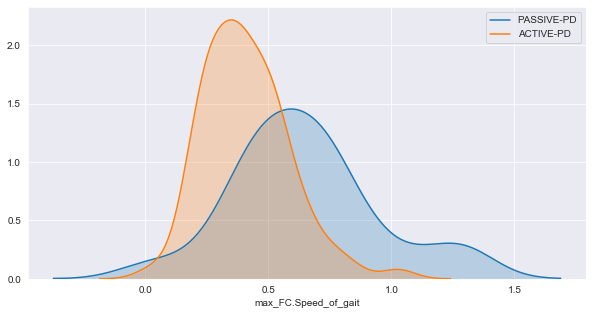

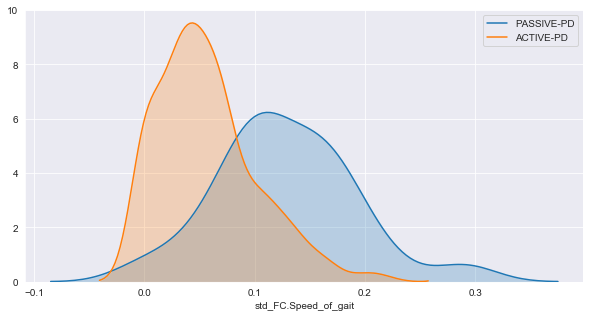

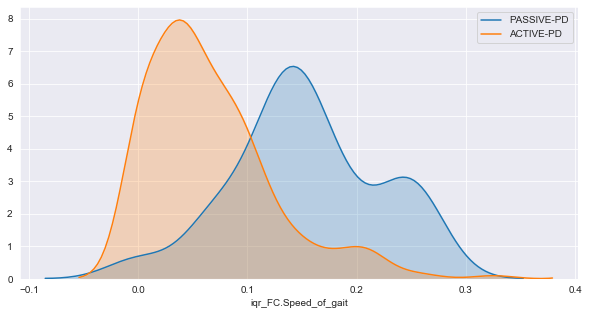

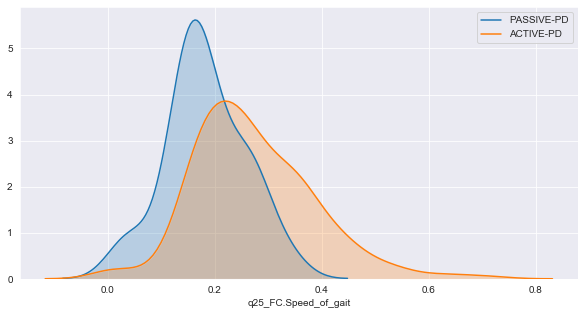

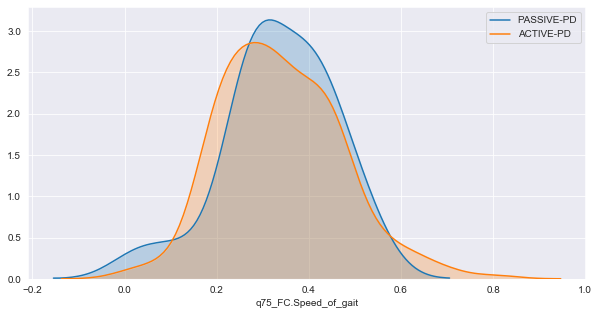

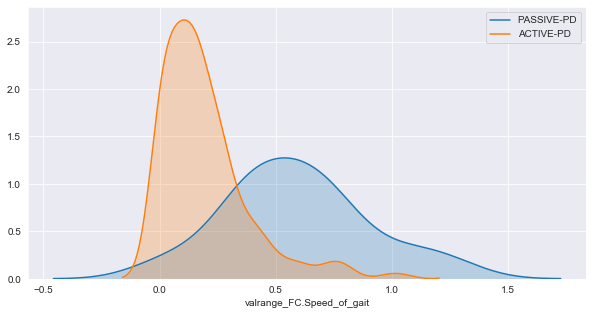

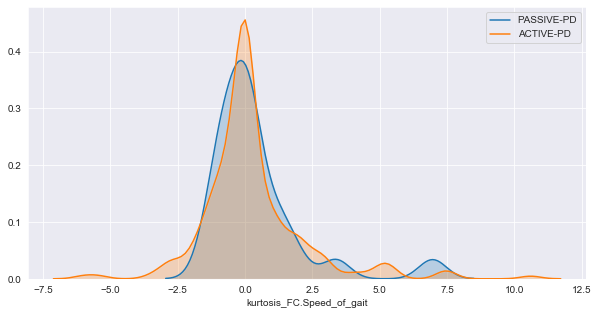

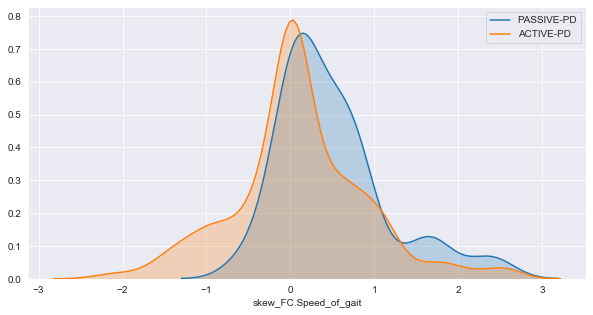

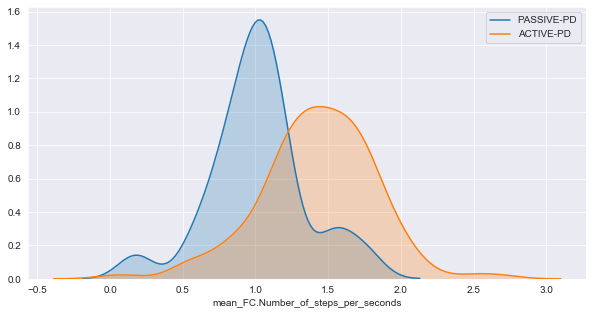

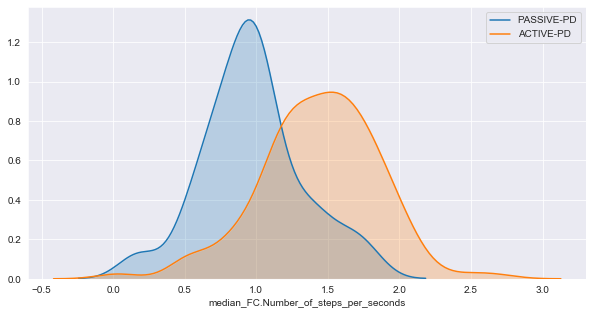

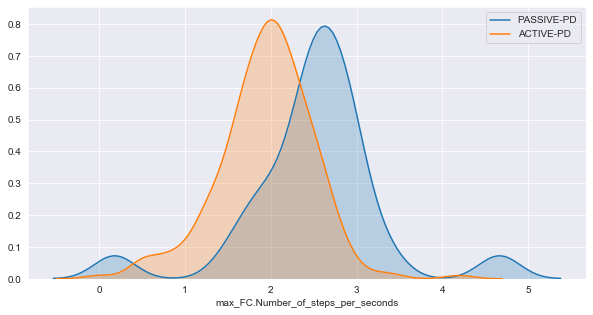

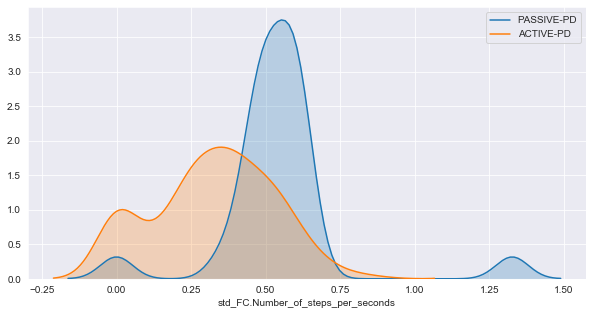

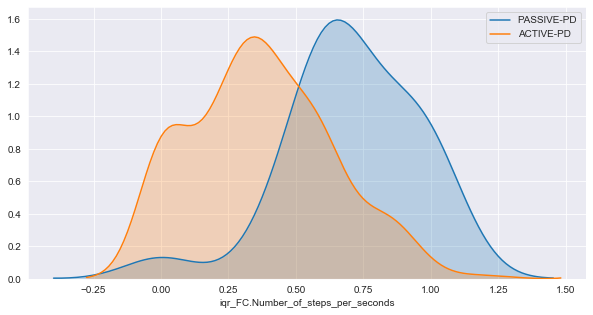

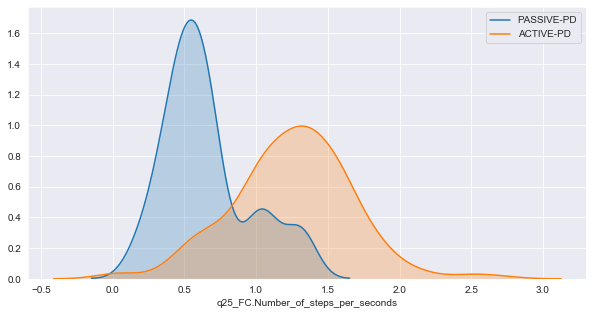

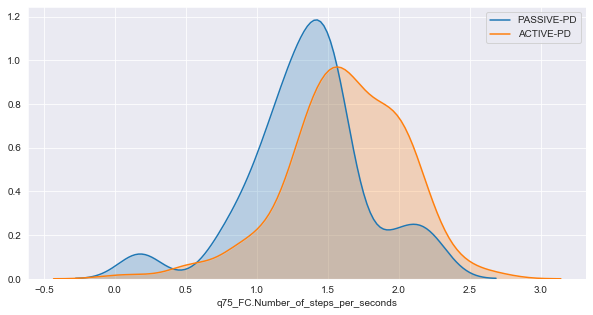

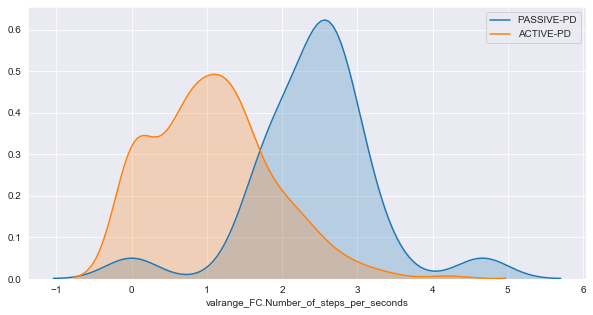

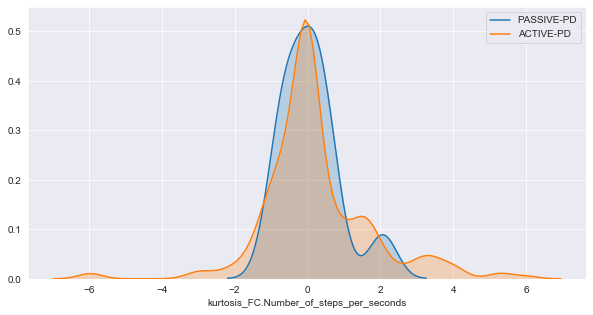

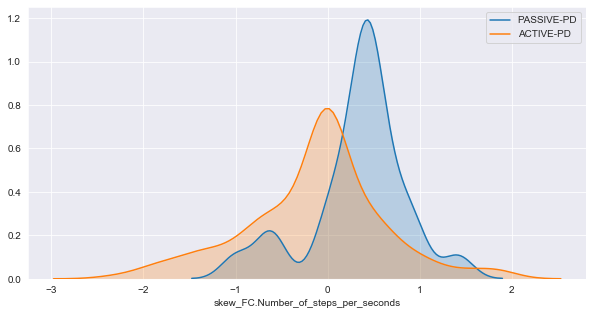

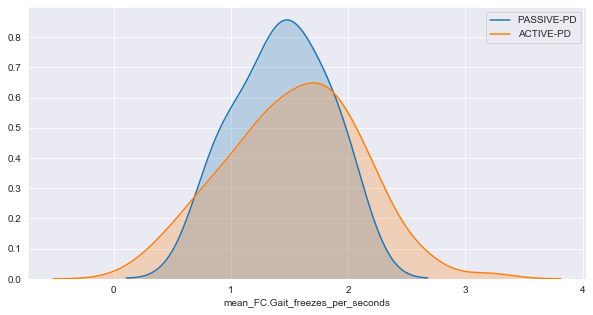

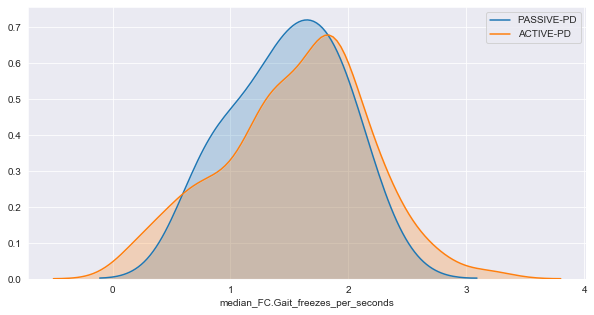

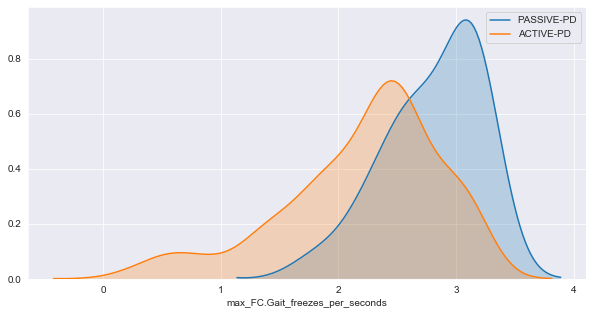

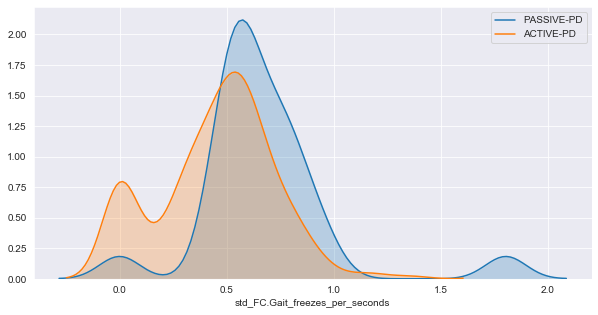

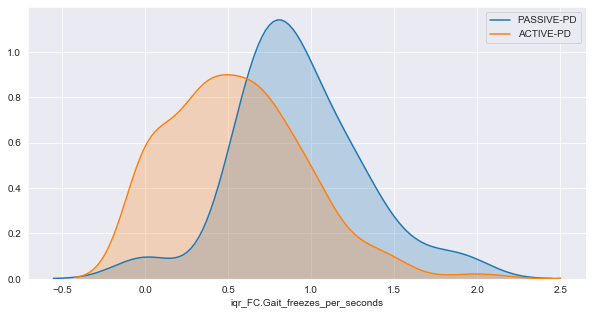

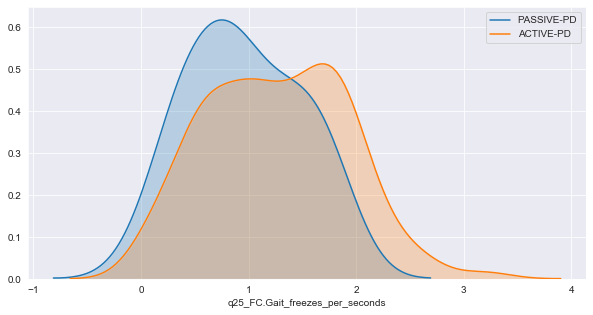

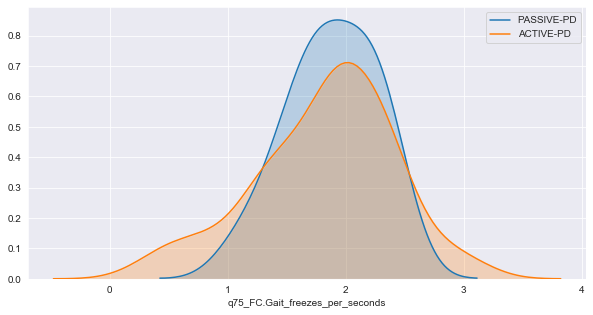

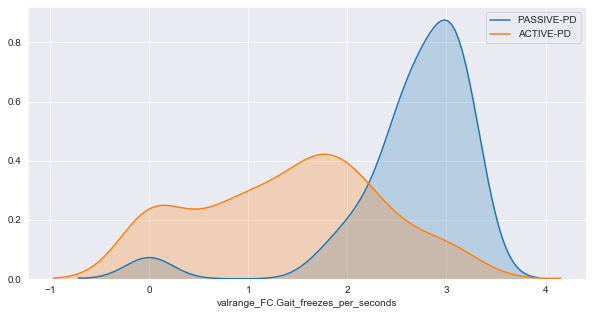

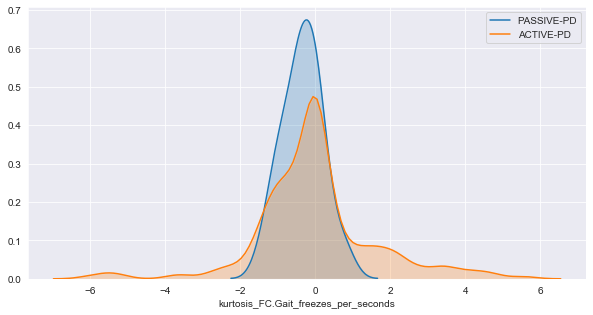

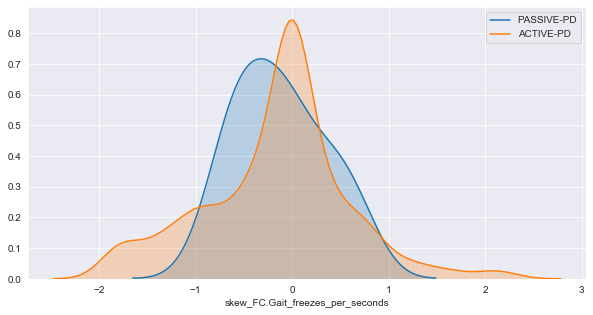

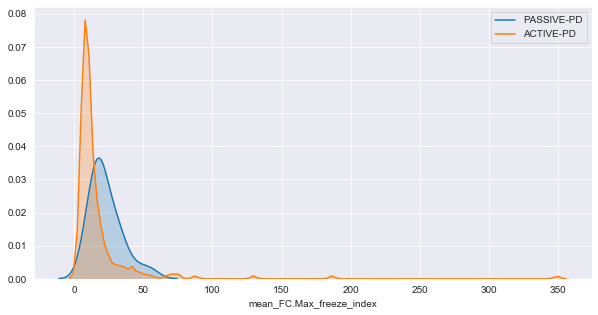

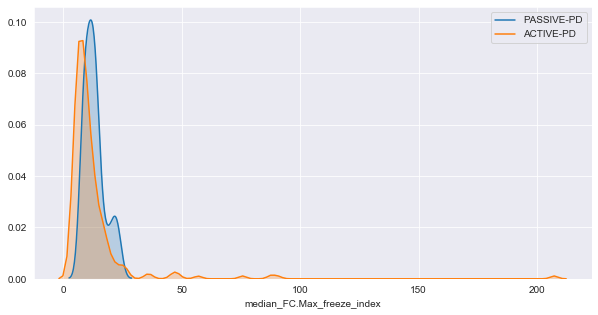

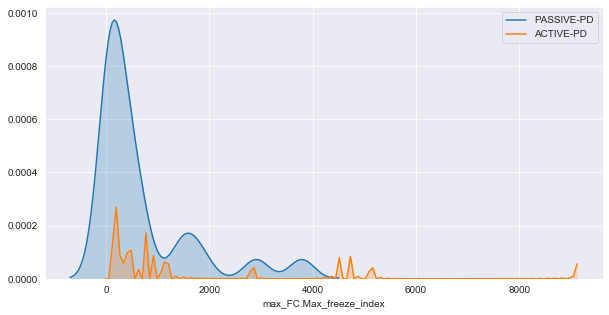

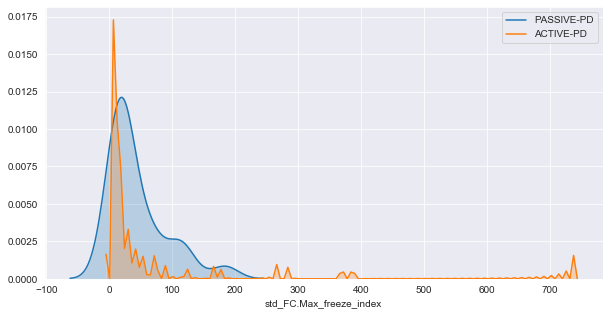

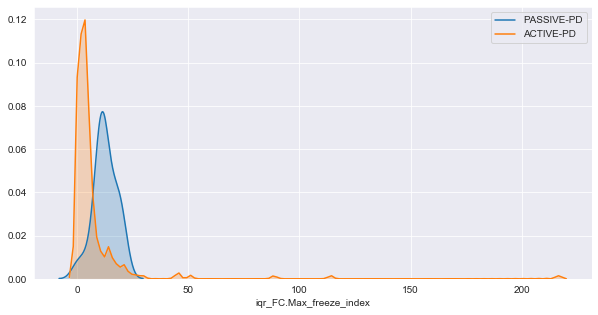

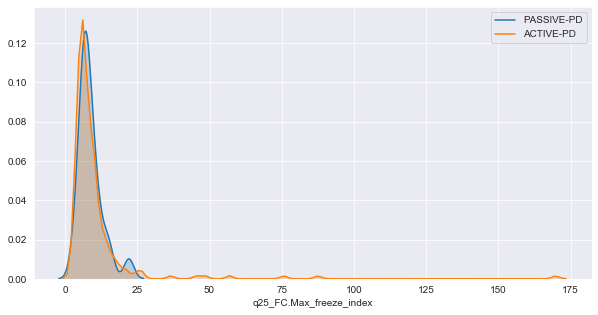

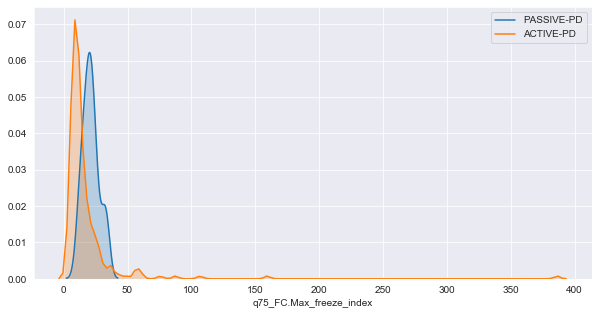

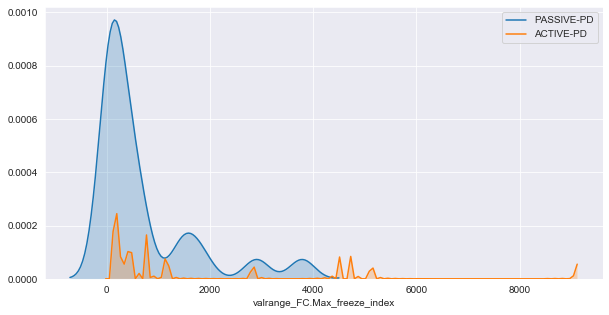

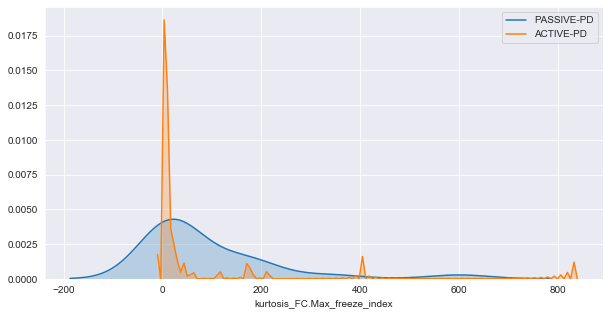

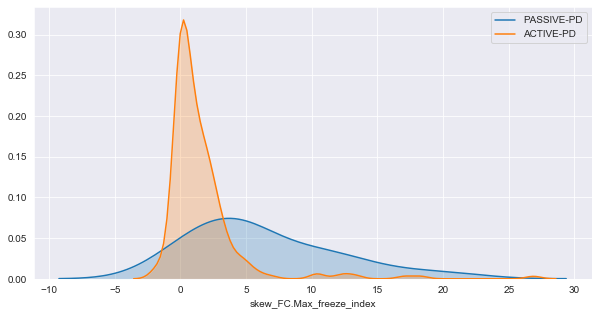

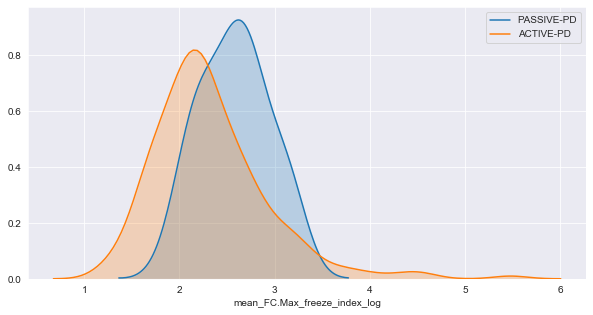

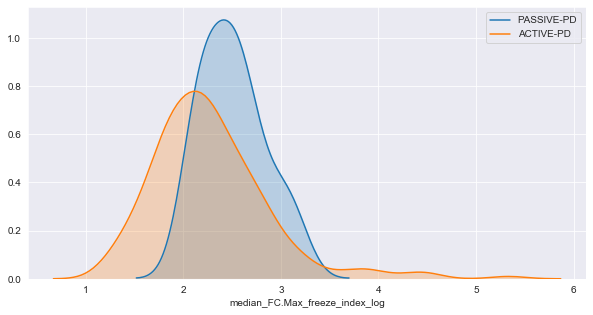

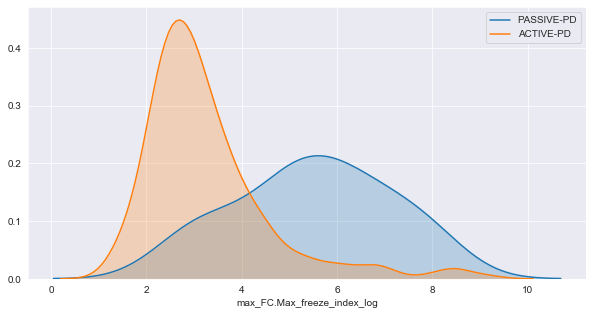

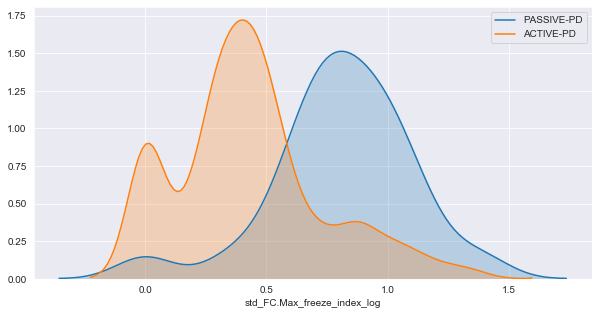

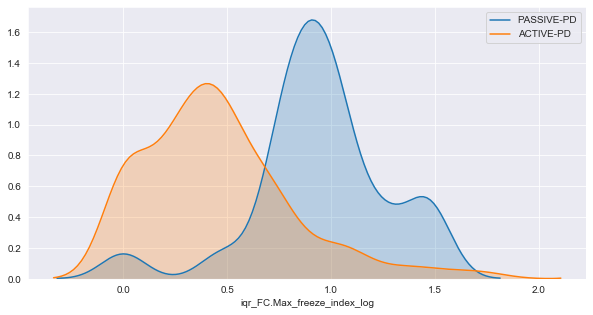

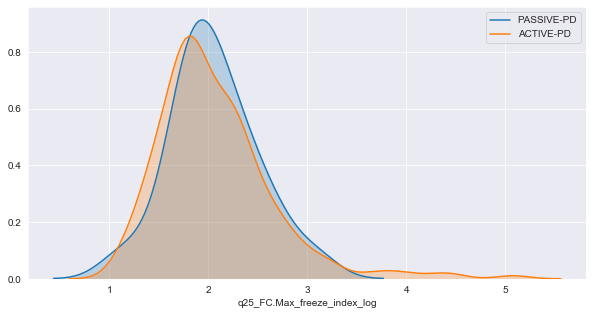

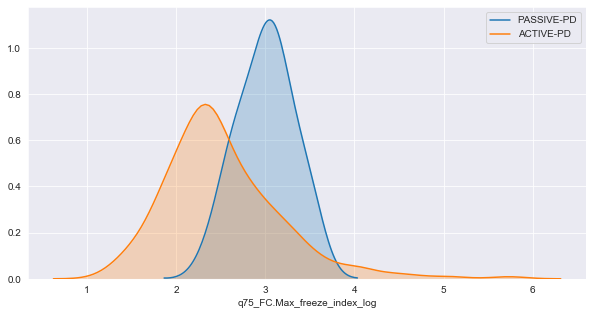

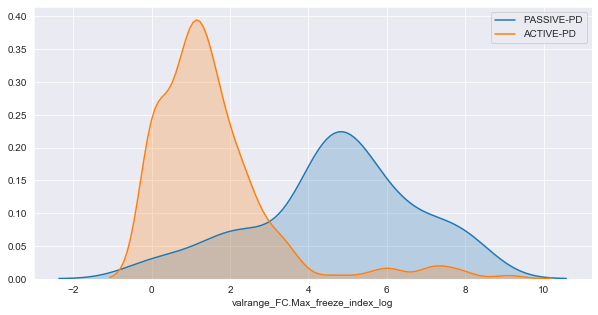

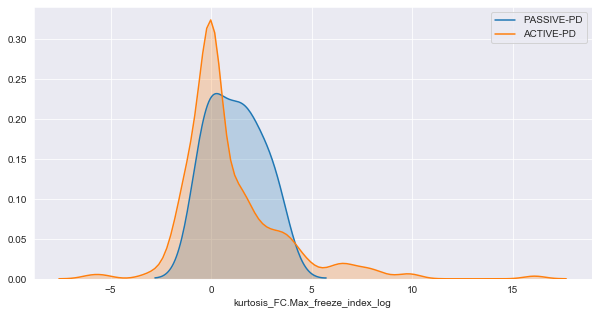

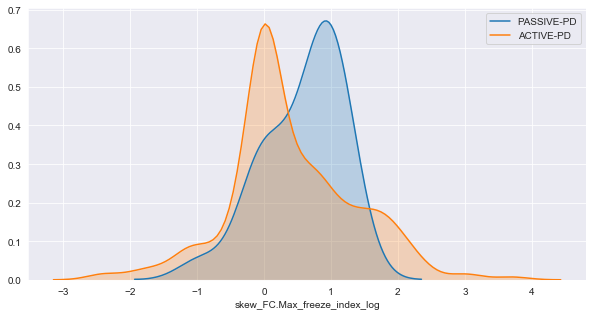

In [12]:
for feature in [feat for feat in grouped_data.columns if "FC" in feat]:
    viz.visualize_passive_active(grouped_data, feature)

## 10). Which of the features have strong attribute in determining PD?
In this analysis, we will explore how each features are able to predict parkinson and non-parkinson and MS in terms of its separation.

# Save Data to Synapse

In [14]:
query.save_data_to_synapse(syn = syn,
                          data = "01.distributions_gait_user.ipynb",
                          output_filename = "01.distributions_gait_user.ipynb",
                          data_parent_id = "syn21448468",
                          source_table_id = "syn21281633",
                          remove = False)


##################################################
 Uploading file to Synapse storage 
##################################################

